# Deriving the Coupled Ordinary Differential Equations of the Weierstrass Sigma Ratios from the Frobenius Stickelberger Determinant Formula

This notebook aims to develop a set of nonlinear coupled ordinary differential equations which have ratios of Weierstrass Sigma functions as their general solutions. The functions in the differential equations are often refered to as modes in accordance with terminology borrowed from nonlinear optics. The degree of nonlinearity is thought of as the highest number of products of mode functions appearing in any term in the differential equations. The author has previously explored special cases of the quadratic and cubic nonlinearity cases and is interested in the general case of those and generalisations to higher order nonlinearities if they exist.

In parts of this notebook I attempt to express the Weierstrass P prime function (derivative of Weierstrass P) in terms of multiples of Kronecker theta functions and to then try to build coupled differential equations using that identity. In other parts, I build a Hamiltonian and would then use Hamiltons equations to build the coupled dynamic system.

In [1]:
from sympy import *
(x, y, X, Y, Z, B, C, n, m, l, j, q, N, M, K, k, epsilon, z, s, p1, p2, p3, g2, g3,
 z0, w1, w2, w3, e1, e2, e3, Delta, 
 omega1, omega2, omega3, eta1, eta2, eta3, d1, d2, d3) = symbols(
    '''x, y, X, Y, Z, B, C, n, m, l, j, q, N, M, K, k, epsilon, z, s, p1, p2, p3, g2, g3,
    z0, w1, w2, w3, e1, e2, e3, Delta, 
    omega1, omega2, omega3, eta1, eta2, eta3, d1, d2, d3'''
)
alpha, delta, t, nu, epsilon, theta = symbols('alpha, delta, t, nu, epsilon, theta')
pw = Function('pw') # Weierstrass P function
pwp = Function('pwp') # Derivative of Weierstrass P function
zw = Function('zw') # Weierstrass Zeta function
sigma = Function('sigma') # Weierstrass Sigma function
rho = Function('rho')
f = Function('f')
h = Function('h')
s = Function('s')
P = Function('P') # Polynomial
Q = Function('Q') # Polynomial
phi = Function('phi')
Phi = Function('Phi')
phi1 = Function('phi1')
phi2 = Function('phi2')
phi3 = Function('phi3')
A = Function('A')
Ac = Function('Ac')
A1 = Function('A1')
A2 = Function('A2')
A3 = Function('A3')
Ac1 = Function('Ac1')
Ac2 = Function('Ac2')
Ac3 = Function('Ac3')
A4 = Function('A4')
A5 = Function('A5')
A6 = Function('A6')
A7 = Function('A7')
A8 = Function('A8')
W1 = Function('W1')
W2 = Function('W2')
W3 = Function('W3')
W4 = Function('W4')
W5 = Function('W5')
W6 = Function('W6')
u = Function('u')
v = Function('v')
Det = Function("Det")

kappa = IndexedBase('kappa')
beta = IndexedBase('beta')
mu = IndexedBase('mu')
xi = IndexedBase('xi')
a = IndexedBase('a')
b = IndexedBase('b')
c = IndexedBase('c')
d = IndexedBase('d')
p = IndexedBase('p')
G = IndexedBase('G')
psi = IndexedBase('psi')
upsilon = IndexedBase('upsilon')
WPdet = Function('WPdet')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
def arrange_for(eq, x): 
    return Eq(x, solve(eq,x)[0].expand())

## Useful Weierstrass Elliptic Function Theory

This section defines some useful well known elliptic function theory which will be used in subsequent sections.

### Some known relations between Weierstrass functions (Whittaker and Watson)

In [3]:
sigma_p_identity = Eq(
    pw(y, g2, g3) - pw(x, g2, g3),
    sigma(x + y, g2, g3) * sigma(x - y, g2, g3) / (sigma(x, g2, g3) ** 2 * sigma(y, g2, g3) ** 2) 
)
sigma_p_identity

Eq(-pw(x, g2, g3) + pw(y, g2, g3), sigma(x - y, g2, g3)*sigma(x + y, g2, g3)/(sigma(x, g2, g3)**2*sigma(y, g2, g3)**2))

In [4]:
sigma_3_vars_det_id = Eq(
   Matrix([[1, pw(x,g2,g3), pwp(x,g2,g3)],[1, pw(y,g2,g3), pwp(y,g2,g3)],[1, pw(z,g2,g3), pwp(z,g2,g3)]]).det(),
    -2*sigma(x+y+z,g2,g3)*sigma(x-y,g2,g3)*sigma(y-z,g2,g3)*sigma(x-z,g2,g3)/
    (sigma(x,g2,g3)**3*sigma(y,g2,g3)**3*sigma(z,g2,g3)**3)
)
sigma_3_vars_det_id

Eq(pw(x, g2, g3)*pwp(y, g2, g3) - pw(x, g2, g3)*pwp(z, g2, g3) - pw(y, g2, g3)*pwp(x, g2, g3) + pw(y, g2, g3)*pwp(z, g2, g3) + pw(z, g2, g3)*pwp(x, g2, g3) - pw(z, g2, g3)*pwp(y, g2, g3), -2*sigma(x - y, g2, g3)*sigma(x - z, g2, g3)*sigma(y - z, g2, g3)*sigma(x + y + z, g2, g3)/(sigma(x, g2, g3)**3*sigma(y, g2, g3)**3*sigma(z, g2, g3)**3))

In [5]:
pw_to_zw_identity = Eq(
    (pwp(x,g2,g3) - pwp(y,g2,g3))/(pw(x,g2,g3) - pw(y,g2,g3))/2,
    zw(x + y,g2, g3) - zw(x,g2, g3) - zw(y,g2, g3)
)
pw_to_zw_identity

Eq((pwp(x, g2, g3) - pwp(y, g2, g3))/(2*(pw(x, g2, g3) - pw(y, g2, g3))), -zw(x, g2, g3) - zw(y, g2, g3) + zw(x + y, g2, g3))

In [6]:
integral_zeta_log_sigma = Eq(Integral(zw(z,g2,g3),z),log(sigma(z,g2,g3)))
integral_zeta_log_sigma

Eq(Integral(zw(z, g2, g3), z), log(sigma(z, g2, g3)))

In [7]:
zeta_eq = Eq(diff(integral_zeta_log_sigma.lhs,z), diff(integral_zeta_log_sigma.rhs,z))
zeta_eq

Eq(zw(z, g2, g3), Derivative(sigma(z, g2, g3), z)/sigma(z, g2, g3))

In [8]:
diff_zeta_eq = Eq(diff(zw(z,g2,g3),z), -pw(z,g2,g3))
diff_zeta_eq

Eq(Derivative(zw(z, g2, g3), z), -pw(z, g2, g3))

In [9]:
diff_pw_eq = Eq(diff(pw(z,g2,g3),z), pwp(z,g2,g3))
diff_pw_eq

Eq(Derivative(pw(z, g2, g3), z), pwp(z, g2, g3))

In [10]:
pwp_sigma_id = Eq(pwp(z,g2,g3),-sigma(2*z,g2,g3)/sigma(z,g2,g3)**4)
pwp_sigma_id

Eq(pwp(z, g2, g3), -sigma(2*z, g2, g3)/sigma(z, g2, g3)**4)

### Quasi Periodicity

In [11]:
sigma_period_eq_1n = Eq(sigma(z + 2 * n * omega1, g2, g3), 
                       (-1) **n * sigma(z, g2, g3) * exp(2 * n * eta1 * (n * omega1 + z)))
sigma_period_eq_1n

Eq(sigma(2*n*omega1 + z, g2, g3), (-1)**n*sigma(z, g2, g3)*exp(2*eta1*n*(n*omega1 + z)))

In [12]:
sigma_period_eq_3n = Eq(sigma(z + 2 * n * omega3, g2, g3), 
                        (-1) **n * sigma(z, g2, g3) * exp(2 * n * eta3 * (n * omega3 + z)))
sigma_period_eq_3n

Eq(sigma(2*n*omega3 + z, g2, g3), (-1)**n*sigma(z, g2, g3)*exp(2*eta3*n*(n*omega3 + z)))

In [13]:
eta_omega_ww = Eq(eta1*omega3-eta3*omega1,I*pi/2)
eta_omega_ww

Eq(eta1*omega3 - eta3*omega1, I*pi/2)

In [14]:
eta1_eta3_omega_id = Eq(exp(4*n*m*eta_omega_ww.lhs), exp(4*n*m*eta_omega_ww.rhs)).subs(exp(2*I*pi*n*m), 1)
eta1_eta3_omega_id

Eq(exp(4*m*n*(eta1*omega3 - eta3*omega1)), 1)

In [15]:
symmetry_nm_eta_omega = Eq(exp(2*m*n*(eta1*omega3-eta3*omega1))*(
    exp(2*m*n*(eta1*omega3-eta3*omega1)).subs(eta_omega_ww.lhs, eta_omega_ww.rhs).subs(exp(I*pi*n*m), (-1)**(n*m))),
   (exp(2*m*n*(eta1*omega3-eta3*omega1))*exp(2*m*n*(eta1*omega3-eta3*omega1))
   ).simplify().subs(eta1_eta3_omega_id.lhs, eta1_eta3_omega_id.rhs)
  )
symmetry_nm_eta_omega

Eq((-1)**(m*n)*exp(2*m*n*(eta1*omega3 - eta3*omega1)), 1)

In [16]:
sigma_period_eq_n1_m3_b = (
    sigma_period_eq_3n
    .subs(n,m)
    .subs(z,z+2*n*omega1)
    .subs(sigma_period_eq_1n.lhs, sigma_period_eq_1n.rhs)
    .simplify()
)
sigma_period_eq_sym_nm = Eq(sigma_period_eq_n1_m3_b.lhs, 
                            sigma_period_eq_n1_m3_b.rhs*symmetry_nm_eta_omega.lhs).expand().simplify()
sigma_period_eq_sym_nm

Eq(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3), (-1)**(m*n + m + n)*sigma(z, g2, g3)*exp(2*eta1*m*n*omega3 + 2*eta1*n**2*omega1 + 2*eta1*n*z + 2*eta3*m**2*omega3 + 2*eta3*m*n*omega1 + 2*eta3*m*z))

In [17]:
sigma_period_eq_sym_nm.args

(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3),
 (-1)**(m*n + m + n)*sigma(z, g2, g3)*exp(2*eta1*m*n*omega3 + 2*eta1*n**2*omega1 + 2*eta1*n*z + 2*eta3*m**2*omega3 + 2*eta3*m*n*omega1 + 2*eta3*m*z))

### Taylor Series

In [18]:
taylor_series = Eq(f(x), Sum(Derivative(f(x),(x,n)).subs(x,a)/factorial(n) * (x - a)**n, (n,0,oo)))
taylor_series_b = taylor_series.subs(x,x+a)

taylor_series
taylor_series_b

Eq(f(x), Sum((x - a)**n*Subs(Derivative(f(x), (x, n)), x, a)/factorial(n), (n, 0, oo)))

Eq(f(x + a), Sum(x**n*Subs(Derivative(f(x), (x, n)), x, a)/factorial(n), (n, 0, oo)))

In [19]:
diff_at_a = Eq(diff(f(y),(y,n)).subs(y,x+a), Derivative(f(x+a),(x,n)))

diff_at_a

Eq(Derivative(f(x+a),(x,n)), diff(f(y),(y,n)).subs(y,x+a)).subs(n,18).doit()

Eq(Subs(Derivative(f(y), (y, n)), y, x + a), Derivative(f(x + a), (x, n)))

True

### Series Expansions

In [20]:
expansion_z_wp = Eq(pw(z,g2,g3), 1/z**2 + Sum((2*n+1)*G[2*n+2]*z**(2*n),(n,1,oo)))
expansion_z_wp

Eq(pw(z, g2, g3), Sum(z**(2*n)*(2*n + 1)*G[2*n + 2], (n, 1, oo)) + z**(-2))

In [21]:
expansion_z_wp_N = Eq(pw(z,g2,g3), 1/z**2 + Sum((2*n+1)*G[2*n+2]*z**(2*n),(n,1,N)))

In [22]:
Eq(diff(pw(z,g2,g3),z), diff(1/z**2,z) + Sum((2*n+1)*G[2*n+2]*diff(z**(2*n),z).simplify(),(n,1,oo)))

Eq(Derivative(pw(z, g2, g3), z), Sum(2*n*z**(2*n - 1)*(2*n + 1)*G[2*n + 2], (n, 1, oo)) - 2/z**3)

In [23]:
expansion_z_j_order_diff_wp = Eq(diff(pw(z,g2,g3),(z,j)), 
   (-1)**j*factorial(j+1)/z**(2+j) + Sum((2*n+1)*G[2*n+2]*Product(2*n-k,(k,0,j-1))*z**(2*n-j),(n,1,oo)))
expansion_z_j_order_diff_wp

Eq(Derivative(pw(z, g2, g3), (z, j)), (-1)**j*z**(-j - 2)*factorial(j + 1) + Sum(z**(-j + 2*n)*(2*n + 1)*G[2*n + 2]*Product(-k + 2*n, (k, 0, j - 1)), (n, 1, oo)))

In [24]:
Eq((2*n+1)*diff(z**(2*n),(z,j)),Piecewise((Product((2*n-k),(k,-1,j-1))*z**(2*n-j), j<=2*n),(0,j>2*n)))

Eq((2*n + 1)*Derivative(z**(2*n), (z, j)), Piecewise((z**(-j + 2*n)*Product(-k + 2*n, (k, -1, j - 1)), j <= 2*n), (0, True)))

In [25]:
Eq((2*n+1)*diff(z**(2*n),(z,j)),Product((2*n-k),(k,-1,j-1)).doit()*z**(2*n-j))

Eq((2*n + 1)*Derivative(z**(2*n), (z, j)), (-1)**(j + 1)*z**(-j + 2*n)*RisingFactorial(-2*n - 1, j + 1))

In [26]:
expansion_z_j_order_diff_wp = Eq(diff(pw(z,g2,g3),(z,j)), 
   (-1)**j*factorial(j+1)/z**(2+j) - (-1)**j*Sum(rf(-2*n-1,j+1)*G[2*n+2]*z**(2*n-j),(n,1,oo)))
expansion_z_j_order_diff_wp

Eq(Derivative(pw(z, g2, g3), (z, j)), (-1)**j*z**(-j - 2)*factorial(j + 1) - (-1)**j*Sum(z**(-j + 2*n)*RisingFactorial(-2*n - 1, j + 1)*G[2*n + 2], (n, 1, oo)))

In [27]:
expansion_z_j_order_diff_wp_lim_z_0 = Eq(Limit(diff(pw(z,g2,g3),(z,j)),z,0), 
   (-1)**j*factorial(j+1)/z**(2+j) - (1+(-1)**j)/2*(-1)**j*rf(-j-1,j+1)*G[j+2])
expansion_z_j_order_diff_wp_lim_z_0

Eq(Limit(Derivative(pw(z, g2, g3), (z, j)), z, 0, dir='+'), (-1)**j*z**(-j - 2)*factorial(j + 1) - (-1)**j*((-1)**j/2 + 1/2)*RisingFactorial(-j - 1, j + 1)*G[j + 2])

In [28]:
expansion_z_j_order_diff_wp_lim_z_0.args

(Limit(Derivative(pw(z, g2, g3), (z, j)), z, 0, dir='+'),
 (-1)**j*z**(-j - 2)*factorial(j + 1) - (-1)**j*((-1)**j/2 + 1/2)*RisingFactorial(-j - 1, j + 1)*G[j + 2])

In [29]:
Eq(Product((j-k),(k,-1,j-1)).doit(), Product((j-k),(k,-1,j-1)))

Eq((-1)**(j + 1)*RisingFactorial(-j - 1, j + 1), Product(j - k, (k, -1, j - 1)))

In [30]:
expansion_z_j_order_diff_wp_lim_z_0_approx = Eq(diff(pw(z,g2,g3),(z,j)), 
   (-1)**j*factorial(j+1)/z**(2+j) + (1+(-1)**j)/2*factorial(j+1)*G[j+2])
expansion_z_j_order_diff_wp_lim_z_0_approx

Eq(Derivative(pw(z, g2, g3), (z, j)), (-1)**j*z**(-j - 2)*factorial(j + 1) + ((-1)**j/2 + 1/2)*factorial(j + 1)*G[j + 2])

In [31]:
Eq(sigma(z,g2,g3), Sum(Sum(a[m,n]*(g2/2)**m*(2*g3)**n*z**(4*m+6*n+1)/(4*m+6*n+1),(n,0,oo)),(m,0,oo)))

Eq(sigma(z, g2, g3), Sum(z**(4*m + 6*n + 1)*(g2/2)**m*(2*g3)**n*a[m, n]/(4*m + 6*n + 1), (n, 0, oo), (m, 0, oo)))

In [32]:
Eq(sigma(z,g2,g3), 
    z + 
    Sum(a[0,n]*(2*g3)**n*z**(6*n+1)/(6*n+1),(n,1,oo)) +
    Sum(a[m,0]*(g2/2)**m*z**(4*m+1)/(4*m+1),(m,1,oo))+
    Sum(Sum(a[m,n]*(g2/2)**m*(2*g3)**n*z**(4*m+6*n+1)/(4*m+6*n+1),(n,1,oo)),(m,1,oo))
  )

Eq(sigma(z, g2, g3), z + Sum(z**(4*m + 1)*(g2/2)**m*a[m, 0]/(4*m + 1), (m, 1, oo)) + Sum(z**(6*n + 1)*(2*g3)**n*a[0, n]/(6*n + 1), (n, 1, oo)) + Sum(z**(4*m + 6*n + 1)*(g2/2)**m*(2*g3)**n*a[m, n]/(4*m + 6*n + 1), (n, 1, oo), (m, 1, oo)))

In [33]:
sigma_NM_order_expansion = Eq(
    sigma(z,g2,g3), Sum(Sum(a[m,n]*(g2/2)**m*(2*g3)**n*z**(4*m+6*n+1)/(4*m+6*n+1),(n,0,N)),(m,0,M)))
# https://mathworld.wolfram.com/WeierstrassSigmaFunction.html
def sigma_order_N_expansion_z(N_order, M_order):
    low_order_a_mn_lookup = [
        [1, -3, -54, 14904],
        [-1, -18, 4968, 502200],
        [-9, 513, 257580, 162100440],
        [69, 33588, 20019960, -9465715080],
        [321, 2808945,-376375410,-4582619446320],
        [160839,-41843142,-210469286736,-1028311276281264]
    ]
    return sigma_NM_order_expansion.subs([(N,N_order),(M,M_order)]).doit().expand().subs([
        (a[n,m], low_order_a_mn_lookup[n][m]) for n in range(0,N_order+1) for m in range(0,M_order+1)
    ])

In [34]:
sigma_order_N_expansion_z(2, 2)

Eq(sigma(z, g2, g3), 85860*g2**2*g3**2*z**21/7 + 171*g2**2*g3*z**15/10 - g2**2*z**9/4 + 9936*g2*g3**2*z**17/17 - 18*g2*g3*z**11/11 - g2*z**5/10 - 216*g3**2*z**13/13 - 6*g3*z**7/7 + z)

In [204]:
sigma_order_N_expansion_z(2, 2).args

(sigma(z, g2, g3),
 85860*g2**2*g3**2*z**21/7 + 171*g2**2*g3*z**15/10 - g2**2*z**9/4 + 9936*g2*g3**2*z**17/17 - 18*g2*g3*z**11/11 - g2*z**5/10 - 216*g3**2*z**13/13 - 6*g3*z**7/7 + z)

In [35]:
Eq(sigma(z,g2,g3), z - g2*z**5/10 - 6*g3/7*z**7 + O(z**9))

Eq(sigma(z, g2, g3), z - 6*g3*z**7/7 - g2*z**5/10 + O(z**9))

In [36]:
Eq(sigma(z,g2,g3), z - z**3*Sum(d[k]*z**(2*k),(k,1,oo)))

Eq(sigma(z, g2, g3), -z**3*Sum(z**(2*k)*d[k], (k, 1, oo)) + z)

In [37]:
Eq(1/sigma(z,g2,g3), 1/z/(1 - z**2*Sum(d[k]*z**(2*k),(k,1,oo))))

Eq(1/sigma(z, g2, g3), 1/(z*(-z**2*Sum(z**(2*k)*d[k], (k, 1, oo)) + 1)))

In [38]:
Eq(1/sigma(z,g2,g3)**N, 1/z**N/(1 - z**2*Sum(d[k]*z**(2*k),(k,1,oo)))**N)

Eq(sigma(z, g2, g3)**(-N), 1/(z**N*(-z**2*Sum(z**(2*k)*d[k], (k, 1, oo)) + 1)**N))

In [39]:
binomial_expansion = Eq(1/(1-x)**N, 1 + Sum(binomial(N+m-1,m)*x**m,(m,1,oo)))
binomial_expansion

Eq((1 - x)**(-N), Sum(x**m*binomial(N + m - 1, m), (m, 1, oo)) + 1)

In [40]:
binomial_expansion.subs(x, z**2*Sum(d[k]*z**(2*k),(k,1,oo)))

Eq((-z**2*Sum(z**(2*k)*d[k], (k, 1, oo)) + 1)**(-N), Sum((z**2*Sum(z**(2*k)*d[k], (k, 1, oo)))**m*binomial(N + m - 1, m), (m, 1, oo)) + 1)

In [41]:
Eq(z**2*Sum(d[k]*z**(2*k),(k,1,oo)), z**2*Sum(d[k]*z**(2*k),(k,1,floor(N/2)-1)) + z**2*(d[k]*z**(2*k)).subs(k,floor(N/2)))

Eq(z**2*Sum(z**(2*k)*d[k], (k, 1, oo)), z**2*z**(2*floor(N/2))*d[floor(N/2)] + z**2*Sum(z**(2*k)*d[k], (k, 1, floor(N/2) - 1)))

The below term is $O(z^{(N+1)})$

In [42]:
z**(floor(N/2)*2+2)

z**(2*floor(N/2) + 2)

In [43]:
k<=floor((N-2)/2)

k <= floor(N/2) - 1

In [44]:
one_over_sigma_z_big_o = Eq(1/sigma(z,g2,g3), 1/z*(1 - (- g2*z**4/10 - 6*g3/7*z**6 + O(z**8))))
one_over_sigma_z_big_o

Eq(1/sigma(z, g2, g3), (1 + 6*g3*z**6/7 + g2*z**4/10 + O(z**8))/z)

In [45]:
one_over_sigma_z_big_o = one_over_sigma_z_big_o.expand()
one_over_sigma_z_big_o

Eq(1/sigma(z, g2, g3), 1/z + 6*g3*z**5/7 + g2*z**3/10 + O(z**7))

In [46]:
one_over_sigma_z_power_N  = Eq((one_over_sigma_z_big_o.lhs**N).simplify(), one_over_sigma_z_big_o.rhs**N)
one_over_sigma_z_power_N 

Eq((1/sigma(z, g2, g3))**N, (1/z + 6*g3*z**5/7 + g2*z**3/10 + O(z**7))**N)

In [47]:
taylor_series_in_z_about_x = Eq(f(z),Sum(diff(f(z),(z,n)).subs(z,x)*(z-x)**n/factorial(n),(n,0,oo)))
taylor_series_in_z_about_x

Eq(f(z), Sum((-x + z)**n*Derivative(f(x), (x, n))/factorial(n), (n, 0, oo)))

In [48]:
sigma_series_in_z_about_x = Eq(sigma(z+x,g2,g3),Sum(diff(sigma(z,g2,g3),(z,n)).subs(z,x)*z**n/factorial(n),(n,0,oo)))
sigma_series_in_z_about_x 

Eq(sigma(x + z, g2, g3), Sum(z**n*Derivative(sigma(x, g2, g3), (x, n))/factorial(n), (n, 0, oo)))

In [49]:
sigma_series_in_z_about_x_order_N = Eq(
    sigma(z+x,g2,g3),Sum(diff(sigma(z,g2,g3),(z,n)).subs(z,x)*z**n/factorial(n),(n,0,N)))
sigma_series_in_z_about_x_order_N

Eq(sigma(x + z, g2, g3), Sum(z**n*Derivative(sigma(x, g2, g3), (x, n))/factorial(n), (n, 0, N)))

In [50]:
diff_sigma_1 = Eq(zeta_eq.rhs*sigma(z,g2,g3), zeta_eq.lhs*sigma(z,g2,g3))
diff_sigma_1

Eq(Derivative(sigma(z, g2, g3), z), sigma(z, g2, g3)*zw(z, g2, g3))

In [51]:
diff_sigma_2 = Eq(diff(diff_sigma_1.lhs, z), 
                  diff(diff_sigma_1.rhs, z).subs([diff_sigma_1.args, diff_zeta_eq.args]).factor()
                 )
diff_sigma_2

Eq(Derivative(sigma(z, g2, g3), (z, 2)), -(pw(z, g2, g3) - zw(z, g2, g3)**2)*sigma(z, g2, g3))

In [52]:
diff_sigma_3 = Eq(diff(diff_sigma_2.lhs, z), 
                  diff(diff_sigma_2.rhs, z).subs([diff_sigma_1.args, diff_zeta_eq.args, diff_pw_eq.args]).factor()
                 )
diff_sigma_3

Eq(Derivative(sigma(z, g2, g3), (z, 3)), -(3*pw(z, g2, g3)*zw(z, g2, g3) + pwp(z, g2, g3) - zw(z, g2, g3)**3)*sigma(z, g2, g3))

In [53]:
diff_sigma_4 = Eq(diff(diff_sigma_3.lhs, z), 
                  diff(diff_sigma_3.rhs, z).subs([
                      diff_sigma_2.args, diff_sigma_1.args, diff_zeta_eq.args, diff_pw_eq.args,
                      (diff(pwp(z,g2,g3),z),-g2/2+6*pw(z,g2,g3)**2)
                  
                  ]).factor()
                 )
diff_sigma_4

Eq(Derivative(sigma(z, g2, g3), (z, 4)), (g2 - 6*pw(z, g2, g3)**2 - 12*pw(z, g2, g3)*zw(z, g2, g3)**2 - 8*pwp(z, g2, g3)*zw(z, g2, g3) + 2*zw(z, g2, g3)**4)*sigma(z, g2, g3)/2)

In [54]:
sigma_z_plus_x_3_exp = Eq(sigma_series_in_z_about_x_order_N.lhs, (sigma_series_in_z_about_x_order_N.subs(N,3).doit()
     .subs(*diff_sigma_3.subs(z,x).args).subs(*diff_sigma_2.subs(z,x).args).subs(*diff_sigma_1.subs(z,x).args)
    ).rhs +O(z**4))
sigma_z_plus_x_3_exp

Eq(sigma(x + z, g2, g3), sigma(x, g2, g3) + z*sigma(x, g2, g3)*zw(x, g2, g3) - z**2*(pw(x, g2, g3) - zw(x, g2, g3)**2)*sigma(x, g2, g3)/2 - z**3*(3*pw(x, g2, g3)*zw(x, g2, g3) + pwp(x, g2, g3) - zw(x, g2, g3)**3)*sigma(x, g2, g3)/6 + O(z**4))

In [55]:
sigma_z_plus_x_4_exp = Eq(sigma_series_in_z_about_x_order_N.lhs, (sigma_series_in_z_about_x_order_N.subs(N,4).doit()
     .subs(*diff_sigma_4.subs(z,x).args)
      .subs(*diff_sigma_3.subs(z,x).args)
      .subs(*diff_sigma_2.subs(z,x).args).subs(*diff_sigma_1.subs(z,x).args)
    ).rhs +O(z**5))
sigma_z_plus_x_4_exp

Eq(sigma(x + z, g2, g3), sigma(x, g2, g3) + z*sigma(x, g2, g3)*zw(x, g2, g3) - z**2*(pw(x, g2, g3) - zw(x, g2, g3)**2)*sigma(x, g2, g3)/2 - z**3*(3*pw(x, g2, g3)*zw(x, g2, g3) + pwp(x, g2, g3) - zw(x, g2, g3)**3)*sigma(x, g2, g3)/6 + z**4*(g2 - 6*pw(x, g2, g3)**2 - 12*pw(x, g2, g3)*zw(x, g2, g3)**2 - 8*pwp(x, g2, g3)*zw(x, g2, g3) + 2*zw(x, g2, g3)**4)*sigma(x, g2, g3)/48 + O(z**5))

In [56]:
sigma_z_minus_x_3_exp = sigma_z_plus_x_3_exp.subs(x,-x).subs([
    (sigma(-x,g2,g3),-sigma(x,g2,g3)), (zw(-x,g2,g3),-zw(x,g2,g3)), 
    (pw(-x,g2,g3),pw(x,g2,g3)), (pwp(-x,g2,g3),-pwp(x,g2,g3))
])
sigma_z_minus_x_3_exp

Eq(sigma(-x + z, g2, g3), -sigma(x, g2, g3) + z*sigma(x, g2, g3)*zw(x, g2, g3) + z**2*(pw(x, g2, g3) - zw(x, g2, g3)**2)*sigma(x, g2, g3)/2 + z**3*(-3*pw(x, g2, g3)*zw(x, g2, g3) - pwp(x, g2, g3) + zw(x, g2, g3)**3)*sigma(x, g2, g3)/6 + O(z**4))

In [57]:
sigma_z_minus_x_4_exp = sigma_z_plus_x_4_exp.subs(x,-x).subs([
    (sigma(-x,g2,g3),-sigma(x,g2,g3)), (zw(-x,g2,g3),-zw(x,g2,g3)), 
    (pw(-x,g2,g3),pw(x,g2,g3)), (pwp(-x,g2,g3),-pwp(x,g2,g3))
])
sigma_z_minus_x_4_exp

Eq(sigma(-x + z, g2, g3), -sigma(x, g2, g3) + z*sigma(x, g2, g3)*zw(x, g2, g3) + z**2*(pw(x, g2, g3) - zw(x, g2, g3)**2)*sigma(x, g2, g3)/2 + z**3*(-3*pw(x, g2, g3)*zw(x, g2, g3) - pwp(x, g2, g3) + zw(x, g2, g3)**3)*sigma(x, g2, g3)/6 - z**4*(g2 - 6*pw(x, g2, g3)**2 - 12*pw(x, g2, g3)*zw(x, g2, g3)**2 - 8*pwp(x, g2, g3)*zw(x, g2, g3) + 2*zw(x, g2, g3)**4)*sigma(x, g2, g3)/48 + O(z**5))

### Higher order derivatives of the Weierstrass P function

Higher order derivatives of the Weierstrass P function can be determined by subsequent differentiation of the defining differential equation. These will be needed later and so the first few are calculated.

In [58]:
wp_diff_eq_1 = Eq((diff(pw(z,g2,g3),z))**2, 4*pw(z,g2,g3)**3 - g2 * pw(z,g2,g3) - g3)
wp_diff_eq_1

Eq(Derivative(pw(z, g2, g3), z)**2, -g2*pw(z, g2, g3) - g3 + 4*pw(z, g2, g3)**3)

In [59]:
wp_diff_eq_2 = Eq(wp_diff_eq_1.lhs.diff(z)/pw(z,g2,g3).diff(z)/2, wp_diff_eq_1.rhs.diff(z)/pw(z,g2,g3).diff(z)/2).expand()
wp_diff_eq_2

Eq(Derivative(pw(z, g2, g3), (z, 2)), -g2/2 + 6*pw(z, g2, g3)**2)

In [60]:
wp_diff_eq_3 = Eq(wp_diff_eq_2.lhs.diff(z), wp_diff_eq_2.rhs.diff(z))
wp_diff_eq_3

Eq(Derivative(pw(z, g2, g3), (z, 3)), 12*pw(z, g2, g3)*Derivative(pw(z, g2, g3), z))

In [61]:
wp_diff_eq_4 = Eq(wp_diff_eq_2.lhs.diff(z,2), wp_diff_eq_2.rhs.diff(z,2).subs([
        (wp_diff_eq_3.lhs, wp_diff_eq_3.rhs),
        (wp_diff_eq_2.lhs, wp_diff_eq_2.rhs),
        (wp_diff_eq_1.lhs, wp_diff_eq_1.rhs),
    ]).expand()
)
wp_diff_eq_4

Eq(Derivative(pw(z, g2, g3), (z, 4)), -18*g2*pw(z, g2, g3) - 12*g3 + 120*pw(z, g2, g3)**3)

In [62]:
wp_diff_eq_5 = Eq(wp_diff_eq_2.lhs.diff(z,3), wp_diff_eq_2.rhs.diff(z,3).subs([
        (wp_diff_eq_4.lhs, wp_diff_eq_4.rhs),
        (wp_diff_eq_3.lhs, wp_diff_eq_3.rhs),
        (wp_diff_eq_2.lhs, wp_diff_eq_2.rhs),
        (wp_diff_eq_1.lhs, wp_diff_eq_1.rhs),
    ]).expand()
)
wp_diff_eq_5

Eq(Derivative(pw(z, g2, g3), (z, 5)), -18*g2*Derivative(pw(z, g2, g3), z) + 360*pw(z, g2, g3)**2*Derivative(pw(z, g2, g3), z))

In [63]:
wp_diff_eq_6 = Eq(wp_diff_eq_2.lhs.diff(z,4), wp_diff_eq_2.rhs.diff(z,4).subs([
        (wp_diff_eq_5.lhs, wp_diff_eq_5.rhs),
        (wp_diff_eq_4.lhs, wp_diff_eq_4.rhs),
        (wp_diff_eq_3.lhs, wp_diff_eq_3.rhs),
        (wp_diff_eq_2.lhs, wp_diff_eq_2.rhs),
        (wp_diff_eq_1.lhs, wp_diff_eq_1.rhs),
    ]).expand()
)
wp_diff_eq_6

Eq(Derivative(pw(z, g2, g3), (z, 6)), 9*g2**2 - 1008*g2*pw(z, g2, g3)**2 - 720*g3*pw(z, g2, g3) + 5040*pw(z, g2, g3)**4)

In [64]:
higher_order_diffs = [
    (wp_diff_eq_6.lhs, wp_diff_eq_6.rhs),
    (wp_diff_eq_5.lhs, wp_diff_eq_5.rhs),
    (wp_diff_eq_4.lhs, wp_diff_eq_4.rhs),
    (wp_diff_eq_3.lhs, wp_diff_eq_3.rhs),
    (wp_diff_eq_2.lhs, wp_diff_eq_2.rhs),
    (wp_diff_eq_1.lhs, wp_diff_eq_1.rhs),
]

### The general differential equation for a ratio of Weierstrass sigma functions

In [65]:
log_sigma_x_plus_z_diff = Eq(Derivative(log(sigma(z + x,g2,g3)/sigma(z,g2,g3)/sigma(x,g2,g3)),z), 
   diff(log(sigma(z + x,g2,g3)/sigma(z,g2,g3)/sigma(x,g2,g3)),z).expand()
  )
log_sigma_x_plus_z_diff

Eq(Derivative(log(sigma(x + z, g2, g3)/(sigma(x, g2, g3)*sigma(z, g2, g3))), z), Subs(Derivative(sigma(_xi_1, g2, g3), _xi_1), _xi_1, x + z)/sigma(x + z, g2, g3) - Derivative(sigma(z, g2, g3), z)/sigma(z, g2, g3))

In [66]:
zeta_eq.subs(z,z+x)

Eq(zw(x + z, g2, g3), Subs(Derivative(sigma(z, g2, g3), z), z, x + z)/sigma(x + z, g2, g3))

In [67]:
log_sig_ratio_zx = Eq(log_sigma_x_plus_z_diff.lhs, 
   log_sigma_x_plus_z_diff.rhs 
   + zeta_eq.subs(z,z+x).lhs - zeta_eq.subs(z,z+x).rhs
   - zeta_eq.lhs + zeta_eq.rhs
  )

log_sig_ratio_zx

Eq(Derivative(log(sigma(x + z, g2, g3)/(sigma(x, g2, g3)*sigma(z, g2, g3))), z), -zw(z, g2, g3) + zw(x + z, g2, g3))

In [68]:
pw_to_zw_identity.subs(y,z)

Eq((pwp(x, g2, g3) - pwp(z, g2, g3))/(2*(pw(x, g2, g3) - pw(z, g2, g3))), -zw(x, g2, g3) - zw(z, g2, g3) + zw(x + z, g2, g3))

In [69]:
log_sig_ratio_zx_p_conj = Eq(log_sig_ratio_zx.lhs, 
   log_sig_ratio_zx.rhs + pw_to_zw_identity.subs(y,z).lhs - pw_to_zw_identity.subs(y,z).rhs
  )
log_sig_ratio_zx_p_conj

Eq(Derivative(log(sigma(x + z, g2, g3)/(sigma(x, g2, g3)*sigma(z, g2, g3))), z), zw(x, g2, g3) + (pwp(x, g2, g3) - pwp(z, g2, g3))/(2*(pw(x, g2, g3) - pw(z, g2, g3))))

In [70]:
log_sig_ratio_zx_p = Eq(log_sig_ratio_zx.lhs, 
   log_sig_ratio_zx.rhs + pw_to_zw_identity.subs(y,z).lhs - pw_to_zw_identity.subs(y,z).rhs
  ).subs(x,-x).subs([
    (sigma(-x,g2,g3), -sigma(x,g2,g3)),
    (zw(-x,g2,g3), -zw(x,g2,g3)),
    (pwp(-x,g2,g3), -pwp(x,g2,g3)),
    (pw(-x,g2,g3), pw(x,g2,g3))
]).subs(Derivative(log(-sigma(-x+z,g2,g3)/sigma(z,g2,g3)/sigma(x,g2,g3)),z), 
        Derivative(log(sigma(-x+z,g2,g3)/sigma(z,g2,g3)/sigma(x,g2,g3)),z))
log_sig_ratio_zx_p

Eq(Derivative(log(sigma(-x + z, g2, g3)/(sigma(x, g2, g3)*sigma(z, g2, g3))), z), -zw(x, g2, g3) + (-pwp(x, g2, g3) - pwp(z, g2, g3))/(2*(pw(x, g2, g3) - pw(z, g2, g3))))

## Frobenius Stickelberger Elliptic Function Determinant Formula

The following addition formula is from Whittaker and Watson 5th edition Example 20.21 p481. It relates a product of Weierstrass Sigma functions to a matrix determinant of the Weierstrass P function and its derivatives. It is attributed to Frobenius and Stickelberger (the author of this current work has attempted an english translation and digitalisation of the original paper). The author of this work considers this identity to be of considerbale importance as it relates a product of $N$ Weierstrass Sigma ratios, each distinguised by a parmeter $\xi_n$ plus the two invariants $g_2, g_3$, to a polynomial in the Weierstrass P function formed with the same invariants. It will be shown how this can be thought of as relating four-wave mixing terms which provide nonlinear coupling, to phase modulation terms which enable decoupling and hence solvability/integrability.

As it is difficult to display the general case for an arbitrary $N$ dimensional matrix in Python, the identity is defined as a Python function and then the first few cases are displayed for low $N$ to give an idea of the nature of the identity. Some of the low order cases are recognisable as well know Weierstrass Elliptic function identities (in fact the author would go so far as to guess that most identities of such a nature that are frequently "discovered" are special cases of the FS determinant formula). Some of the low order identities are also typed in explicitly from the literature and compared to the function output for the general case as a test to check for errors in the implementation of the general formula.

### The Determinant of Derivatives of Weierstrass P Functions

Let $\mathrm{WPdet}$ denote the following matrix determinant of derivatives of the Weiertrass P function. In general, the $N$ dimensional case is a function of $N+1$ free complex parameters $\mu_n$ and two free complex ellptic invariants $g_2,g_3$, where "free" means their values can be arbitrarily assigned and still satisfy the identity. To simplify the notation not all parameters will always be specified but the following should be considered equivalent:

In [71]:
Eq(WPdet(N), WPdet(mu[n], g2, g3))

Eq(WPdet(N), WPdet(mu[n], g2, g3))

In [72]:
def p_matrix_f_s(N): 
    return Matrix([[1, *[pw(x,g2,g3).diff((x,j)).subs(x,mu[k]) for j in range(N)]] for k in range(N+1)])

In [73]:
Eq(WPdet(1), Det(p_matrix_f_s(1)))

Eq(WPdet(1), Det(Matrix([
[1, pw(mu[0], g2, g3)],
[1, pw(mu[1], g2, g3)]])))

In [74]:
Eq(WPdet(2), Det(p_matrix_f_s(2)))

Eq(WPdet(2), Det(Matrix([
[1, pw(mu[0], g2, g3), Derivative(pw(mu[0], g2, g3), mu[0])],
[1, pw(mu[1], g2, g3), Derivative(pw(mu[1], g2, g3), mu[1])],
[1, pw(mu[2], g2, g3), Derivative(pw(mu[2], g2, g3), mu[2])]])))

In [75]:
Eq(WPdet(3), Det(p_matrix_f_s(3)))

Eq(WPdet(3), Det(Matrix([
[1, pw(mu[0], g2, g3), Derivative(pw(mu[0], g2, g3), mu[0]), Derivative(pw(mu[0], g2, g3), (mu[0], 2))],
[1, pw(mu[1], g2, g3), Derivative(pw(mu[1], g2, g3), mu[1]), Derivative(pw(mu[1], g2, g3), (mu[1], 2))],
[1, pw(mu[2], g2, g3), Derivative(pw(mu[2], g2, g3), mu[2]), Derivative(pw(mu[2], g2, g3), (mu[2], 2))],
[1, pw(mu[3], g2, g3), Derivative(pw(mu[3], g2, g3), mu[3]), Derivative(pw(mu[3], g2, g3), (mu[3], 2))]])))

### Products of Weierstarss Sigma Functions and the FS Determinant Formula Definition

The FS determinant fromula relates the determinnat of derivatives of the Weierstrass P function, to products of Weierstrass Sigma functions. It is defined as:

In [76]:
sigma_product_f_s = (
    (-1)**(N*(N-1)/2)*
    Product(factorial(k),(k,1,N))*
    sigma(Sum(mu[j],(j,0,N)),g2,g3)*
    Product(Product(Piecewise((sigma(mu[l] - mu[m], g2, g3),l<m),(1,True)),(l,0,N)),(m,0,N))/
    Product(sigma(mu[n],g2,g3)**(N+1),(n,0,N))
)

def frob_stick(Nval, evaluated=False, WPversion=False):
    if evaluated:
        return Eq(p_matrix_f_s(Nval).det(), sigma_product_f_s.subs(N,Nval).doit())
    elif WPversion:
        return Eq(WPdet(Nval), sigma_product_f_s.subs(N,Nval).doit())
    return Eq(Det(p_matrix_f_s(Nval)), sigma_product_f_s.subs(N,Nval).doit())

In [77]:
Eq(WPdet(N), sigma_product_f_s)

Eq(WPdet(N), (-1)**(N*(N - 1)/2)*sigma(Sum(mu[j], (j, 0, N)), g2, g3)*Product(factorial(k), (k, 1, N))*Product(Piecewise((sigma(mu[l] - mu[m], g2, g3), l < m), (1, True)), (l, 0, N), (m, 0, N))/Product(sigma(mu[n], g2, g3)**(N + 1), (n, 0, N)))

### N=1 Case 

The $N=1$ cases gives the familiar relation between Sigma and Weierstrass P in Ex 20.5.2 p473 Whittaker and Watson 5th edition. Typed in explicitly from the literature for testing purposes this identity is:

In [78]:
sigma_p_identity

Eq(-pw(x, g2, g3) + pw(y, g2, g3), sigma(x - y, g2, g3)*sigma(x + y, g2, g3)/(sigma(x, g2, g3)**2*sigma(y, g2, g3)**2))

The FS determinant formula typed into this notebook for the $N=1$ case gives:

In [79]:
frob_stick(1, WPversion=True)

Eq(WPdet(1), sigma(mu[0] - mu[1], g2, g3)*sigma(mu[0] + mu[1], g2, g3)/(sigma(mu[0], g2, g3)**2*sigma(mu[1], g2, g3)**2))

In [80]:
frob_stick(1)

Eq(Det(Matrix([
[1, pw(mu[0], g2, g3)],
[1, pw(mu[1], g2, g3)]])), sigma(mu[0] - mu[1], g2, g3)*sigma(mu[0] + mu[1], g2, g3)/(sigma(mu[0], g2, g3)**2*sigma(mu[1], g2, g3)**2))

In [81]:
frob_stick(1, evaluated=True)

Eq(-pw(mu[0], g2, g3) + pw(mu[1], g2, g3), sigma(mu[0] - mu[1], g2, g3)*sigma(mu[0] + mu[1], g2, g3)/(sigma(mu[0], g2, g3)**2*sigma(mu[1], g2, g3)**2))

The test shows these to be equivalent:

In [82]:
N_1_case_f_s = frob_stick(1, evaluated=True).subs([(mu[0],x),(mu[1],z)])
(N_1_case_f_s.rhs - sigma_p_identity.lhs == 0) & (N_1_case_f_s.lhs - sigma_p_identity.rhs == 0)

False

### N=2 Case 

The $N=2$ case gives the example in Ex 20.20 Whittaker and Watson 5th edition p481. Typed in explicitly from the literature for testing purposes this identity is:

In [83]:
sigma_3_vars_det_id

Eq(pw(x, g2, g3)*pwp(y, g2, g3) - pw(x, g2, g3)*pwp(z, g2, g3) - pw(y, g2, g3)*pwp(x, g2, g3) + pw(y, g2, g3)*pwp(z, g2, g3) + pw(z, g2, g3)*pwp(x, g2, g3) - pw(z, g2, g3)*pwp(y, g2, g3), -2*sigma(x - y, g2, g3)*sigma(x - z, g2, g3)*sigma(y - z, g2, g3)*sigma(x + y + z, g2, g3)/(sigma(x, g2, g3)**3*sigma(y, g2, g3)**3*sigma(z, g2, g3)**3))

The FS determinant formula typed into this notebook for the $N=2$ case gives:

In [84]:
frob_stick(2, WPversion=True)

Eq(WPdet(2), -2*sigma(mu[0] - mu[1], g2, g3)*sigma(mu[0] - mu[2], g2, g3)*sigma(mu[1] - mu[2], g2, g3)*sigma(mu[0] + mu[1] + mu[2], g2, g3)/(sigma(mu[0], g2, g3)**3*sigma(mu[1], g2, g3)**3*sigma(mu[2], g2, g3)**3))

In [85]:
frob_stick(2)

Eq(Det(Matrix([
[1, pw(mu[0], g2, g3), Derivative(pw(mu[0], g2, g3), mu[0])],
[1, pw(mu[1], g2, g3), Derivative(pw(mu[1], g2, g3), mu[1])],
[1, pw(mu[2], g2, g3), Derivative(pw(mu[2], g2, g3), mu[2])]])), -2*sigma(mu[0] - mu[1], g2, g3)*sigma(mu[0] - mu[2], g2, g3)*sigma(mu[1] - mu[2], g2, g3)*sigma(mu[0] + mu[1] + mu[2], g2, g3)/(sigma(mu[0], g2, g3)**3*sigma(mu[1], g2, g3)**3*sigma(mu[2], g2, g3)**3))

In [86]:
frob_stick(2, evaluated=True)

Eq(pw(mu[0], g2, g3)*Derivative(pw(mu[1], g2, g3), mu[1]) - pw(mu[0], g2, g3)*Derivative(pw(mu[2], g2, g3), mu[2]) - pw(mu[1], g2, g3)*Derivative(pw(mu[0], g2, g3), mu[0]) + pw(mu[1], g2, g3)*Derivative(pw(mu[2], g2, g3), mu[2]) + pw(mu[2], g2, g3)*Derivative(pw(mu[0], g2, g3), mu[0]) - pw(mu[2], g2, g3)*Derivative(pw(mu[1], g2, g3), mu[1]), -2*sigma(mu[0] - mu[1], g2, g3)*sigma(mu[0] - mu[2], g2, g3)*sigma(mu[1] - mu[2], g2, g3)*sigma(mu[0] + mu[1] + mu[2], g2, g3)/(sigma(mu[0], g2, g3)**3*sigma(mu[1], g2, g3)**3*sigma(mu[2], g2, g3)**3))

The test shows these to be equivalent:

In [87]:
N_2_case_f_s = frob_stick(2, evaluated=True).subs([
    *[(Derivative(pw(mu[k], g2, g3), mu[k]), pwp(mu[k],g2,g3)) for k in range(2+1)]
]).subs([(mu[0],x),(mu[1],y),(mu[2],z)])
(sigma_3_vars_det_id.lhs-N_2_case_f_s.lhs == 0) & (sigma_3_vars_det_id.rhs-N_2_case_f_s.rhs == 0)

True

## The one-dimensional z case

In this section, it is shown that the product of sigma functions can be factored into a simpler form by dividing the determinant of the $N$ case by the determinant of the $N-1$ case. Thereafter, the final row of the $N$ dinensional matrix is considered to be a function of a single variable $z$ and the other rows are considered constants, therfore the $N-1$ case is a constant when considering only the $N^{th}$ row as a function of $z$. In this form, the $z$ variable would respresent distance along some optical waveguide while the $N-1$ parameters distinguish the modes.

In [88]:
sigma_product_f_s_N_factored = (
    (-1)**(N*(N-1)/2)*
    Product(factorial(k),(k,1,N-1))*
    factorial(N)*
    sigma(Sum(mu[j],(j,0,N)),g2,g3)*
    Product(Product(Piecewise((sigma(mu[l] - mu[m], g2, g3),l<m),(1,True)),(l,0,N-1)),(m,0,N-1))*
    Product(Piecewise((sigma(mu[l] - mu[N], g2, g3),l<N),(1,True)),(l,0,N))/
    Product(sigma(mu[n],g2,g3)**(N),(n,0,N))/
    Product(sigma(mu[n],g2,g3),(n,0,N))
)

sigma_product_f_s_N_over_N_minus_1 = (sigma_product_f_s_N_factored/sigma_product_f_s.subs(N,N-1))

sigma_product_f_s_N_over_N_minus_1_explicitly_typed = (
    (-1)**(N*(N-1)/2)*
    (-1)**(-(N-2)*(N-1)/2)*
    sigma(Sum(mu[j],(j,0,N)),g2,g3)*
    factorial(N)*
    Product(Piecewise((sigma(mu[l] - mu[N], g2, g3),l<N),(1,True)),(l,0,N))*
    Product(sigma(mu[n],g2,g3)**(N),(n,0,N-1))/
    sigma(Sum(mu[j],(j,0,N-1)),g2,g3)/
    Product(sigma(mu[n],g2,g3),(n,0,N))/
    Product(sigma(mu[n],g2,g3)**N,(n,0,N))
)

subs1_list = [
    (Product(Piecewise((sigma(mu[l] - mu[N], g2, g3),l<N),(1,True)),(l,0,N)), 
     (-1)**N*Product(sigma(z - xi[l], g2, g3),(l,0,N))/sigma(z - xi[N], g2, g3)),
    (Product(sigma(mu[n],g2,g3),(n,0,N)),Product(sigma(xi[n],g2,g3),(n,0,N))*sigma(z,g2,g3)/sigma(xi[N],g2,g3)),
    (sigma(Sum(mu[j],(j,0,N-1)),g2,g3),-sigma(xi[N],g2,g3)),
    (Sum(mu[j],(j,0,N)),-xi[N]+z),
    (sigma(mu[N],g2,g3),sigma(z,g2,g3))
]
subs2_list = [
    ((-1)**(2*N)*Product(sigma(z - xi[l], g2, g3),(l,0,N)), 
   Product(sigma(z - xi[l], g2, g3)/sigma(xi[l], g2, g3)/sigma(z, g2, g3),(l,0,N)) *
   Product(sigma(xi[n], g2, g3),(n,0,N)) *
   (Product(sigma(z, g2, g3),(l,0,N)).doit()))
]

[(sigma_product_f_s - sigma_product_f_s_N_factored).subs(N,3).doit() == 0,
(sigma_product_f_s_N_over_N_minus_1 - sigma_product_f_s_N_over_N_minus_1_explicitly_typed).simplify() == 0]

[True, True]

In [89]:
Eq(WPdet(N), sigma_product_f_s_N_factored)

Eq(WPdet(N), (-1)**(N*(N - 1)/2)*sigma(Sum(mu[j], (j, 0, N)), g2, g3)*factorial(N)*Product(Piecewise((sigma(-mu[N] + mu[l], g2, g3), N > l), (1, True)), (l, 0, N))*Product(factorial(k), (k, 1, N - 1))*Product(Piecewise((sigma(mu[l] - mu[m], g2, g3), l < m), (1, True)), (l, 0, N - 1), (m, 0, N - 1))/(Product(sigma(mu[n], g2, g3), (n, 0, N))*Product(sigma(mu[n], g2, g3)**N, (n, 0, N))))

In [90]:
wp_sigma_product_fs_N_over_N_minus_1_mu_n = Eq(WPdet(N)/WPdet(N-1), sigma_product_f_s_N_over_N_minus_1).subs(
    Product(sigma(mu[n],g2,g3)**N,(n,0,N)),sigma(mu[N],g2,g3)**N*Product(sigma(mu[n],g2,g3)**N,(n,0,N-1))
).expand()
wp_sigma_product_fs_N_over_N_minus_1_mu_n

Eq(WPdet(N)/WPdet(N - 1), -(-1)**N*sigma(Sum(mu[j], (j, 0, N)), g2, g3)*factorial(N)*Product(Piecewise((sigma(-mu[N] + mu[l], g2, g3), N > l), (1, True)), (l, 0, N))/(sigma(mu[N], g2, g3)**N*sigma(Sum(mu[j], (j, 0, N - 1)), g2, g3)*Product(sigma(mu[n], g2, g3), (n, 0, N))))

The following parameters $\xi_n$ and $z$ are defined in terms of $\mu_n$:

In [91]:
Eq(mu[N],z)

Eq(mu[N], z)

In [92]:
Eq(xi[k],Piecewise((mu[k],k<N),(-Sum(mu[j],(j,0,N-1)),Eq(k,N))))

Eq(xi[k], Piecewise((mu[k], N > k), (-Sum(mu[j], (j, 0, N - 1)), Eq(N, k))))

subject to the constraint:

In [93]:
Eq(Sum(xi[j],(j,0,N)),0)

Eq(Sum(xi[j], (j, 0, N)), 0)

It follows from the following consequential substitutions:

In [94]:
for eq in subs1_list + subs2_list:
    Eq(*eq)

Eq(Product(Piecewise((sigma(-mu[N] + mu[l], g2, g3), N > l), (1, True)), (l, 0, N)), (-1)**N*Product(sigma(z - xi[l], g2, g3), (l, 0, N))/sigma(z - xi[N], g2, g3))

Eq(Product(sigma(mu[n], g2, g3), (n, 0, N)), sigma(z, g2, g3)*Product(sigma(xi[n], g2, g3), (n, 0, N))/sigma(xi[N], g2, g3))

Eq(sigma(Sum(mu[j], (j, 0, N - 1)), g2, g3), -sigma(xi[N], g2, g3))

Eq(Sum(mu[j], (j, 0, N)), z - xi[N])

Eq(sigma(mu[N], g2, g3), sigma(z, g2, g3))

Eq((-1)**(2*N)*Product(sigma(z - xi[l], g2, g3), (l, 0, N)), sigma(z, g2, g3)**(N + 1)*Product(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, N))*Product(sigma(xi[n], g2, g3), (n, 0, N)))

that, what is refered to as the one-dimensional $z$ case takes the remarkably simple form:

In [95]:
wp_sigma_product_fs_N_over_N_minus_1 = (
    wp_sigma_product_fs_N_over_N_minus_1_mu_n
    .subs(subs1_list)
    .subs(subs2_list)
).expand()
sigma_product_f_s_N_over_N_minus_1 = wp_sigma_product_fs_N_over_N_minus_1.rhs

wp_sigma_product_fs_N_over_N_minus_1

Eq(WPdet(N)/WPdet(N - 1), sigma(z, g2, g3)**(N + 1)*factorial(N)*Product(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, N))/(sigma(z, g2, g3)*sigma(z, g2, g3)**N))

In [96]:
def p_matrix_f_s_1dz(N): 
    return Matrix([*[[1, *[pw(x,g2,g3).diff((x,j)).subs(x,mu[k]) for j in range(N)]] for k in range(N)],
       [1, *[pw(z,g2,g3).diff((z,j)) for j in range(N)]]])

def frob_stick_1dz_ratio(Nval, evaluated=False):
    if evaluated:
        return Eq((((-1)**(Nval-1)/factorial(Nval)*p_matrix_f_s_1dz(Nval).det()/p_matrix_f_s(Nval-1).det()).expand())
                  .collect([pw(z,g2,g3), diff(pw(z,g2,g3),z)],factor), 
                  (-1)**(Nval-1)/factorial(Nval)*sigma_product_f_s_N_over_N_minus_1.subs(N,Nval).doit().subs(
            xi[Nval],-Sum(xi[j],(j,0,Nval-1)).doit()
        ).subs([(xi[j],mu[j]) for j in range(Nval)]))
    return Eq((-1)**(Nval-1)/factorial(Nval)*Det(p_matrix_f_s_1dz(Nval))/Det(p_matrix_f_s(Nval-1)), 
              (-1)**(Nval-1)/factorial(Nval)*sigma_product_f_s_N_over_N_minus_1.subs(N,Nval).doit().subs(
            xi[Nval],-Sum(xi[j],(j,0,Nval-1)).doit()
        ).subs([(xi[j],mu[j]) for j in range(Nval)]))


In [97]:
sigma_product_f_s_N_over_N_minus_1.subs(N,2)

2*Product(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, 2))

### Example for the $N=1$ case

In [98]:
frob_stick_1dz_ratio(1)

Eq(Det(Matrix([
[1, pw(mu[0], g2, g3)],
[1,     pw(z, g2, g3)]]))*Det(Matrix([[1]]))**(-1), sigma(z - mu[0], g2, g3)*sigma(z + mu[0], g2, g3)/(sigma(z, g2, g3)**2*sigma(-mu[0], g2, g3)*sigma(mu[0], g2, g3)))

In [99]:
frob_stick_1dz_ratio(1,evaluated=True)

Eq(pw(z, g2, g3) - pw(mu[0], g2, g3), sigma(z - mu[0], g2, g3)*sigma(z + mu[0], g2, g3)/(sigma(z, g2, g3)**2*sigma(-mu[0], g2, g3)*sigma(mu[0], g2, g3)))

### Example for the $N=2$ case

This is a very interesting case. In its most general form when $\mu_0 \ne \mu_1$ it describes three wave mixing in quadratic nonlinear media. In the degenerate case where $\mu_0 = \mu_1$ it describes second harmonic generation in a quadratic nonlinear medium. In the special degenerate case where $\mu_0 = \mu_1 = \frac{2}{3}\omega$ where $\omega$ is any half-period (in which case $-2 \mu_0$ is congruent to $\mu_0$ and degeneracy reduces the number of modes), the system becomes that considered by Dixon, which under further restriction on initial conditions defines the Dixon elliptic functions. There is thus a rich hierarchy of signifigant systems that inherit there dynamics from this particular case of the determinant formula.

In [100]:
frob_stick_1dz_ratio_N_2 = frob_stick_1dz_ratio(2)
frob_stick_1dz_ratio_N_2

Eq(-Det(Matrix([
[1, pw(mu[0], g2, g3), Derivative(pw(mu[0], g2, g3), mu[0])],
[1, pw(mu[1], g2, g3), Derivative(pw(mu[1], g2, g3), mu[1])],
[1,     pw(z, g2, g3),         Derivative(pw(z, g2, g3), z)]]))*Det(Matrix([
[1, pw(mu[0], g2, g3)],
[1, pw(mu[1], g2, g3)]]))**(-1)/2, -sigma(z - mu[0], g2, g3)*sigma(z - mu[1], g2, g3)*sigma(z + mu[0] + mu[1], g2, g3)/(sigma(z, g2, g3)**3*sigma(-mu[0] - mu[1], g2, g3)*sigma(mu[0], g2, g3)*sigma(mu[1], g2, g3)))

In [101]:
frob_stick_1dz_ratio(2,evaluated=True)

Eq(-(-pw(mu[0], g2, g3)*Derivative(pw(mu[1], g2, g3), mu[1]) + pw(mu[1], g2, g3)*Derivative(pw(mu[0], g2, g3), mu[0]))/(2*(pw(mu[0], g2, g3) - pw(mu[1], g2, g3))) - Derivative(pw(z, g2, g3), z)/2 + (Derivative(pw(mu[0], g2, g3), mu[0]) - Derivative(pw(mu[1], g2, g3), mu[1]))*pw(z, g2, g3)/(2*(pw(mu[0], g2, g3) - pw(mu[1], g2, g3))), -sigma(z - mu[0], g2, g3)*sigma(z - mu[1], g2, g3)*sigma(z + mu[0] + mu[1], g2, g3)/(sigma(z, g2, g3)**3*sigma(-mu[0] - mu[1], g2, g3)*sigma(mu[0], g2, g3)*sigma(mu[1], g2, g3)))

#### Special degenerate case

There are some special cases in physics and in other areas of mathematics that can be desrcribed by degenerate cases where the $\mu_j$ values are not all unique. In order to explore these, some care is required because both determinants on the left hand side become zero when a row or a column is repeated. The right hand side is in general well defined though and the left hand side can be taken as a limit.

In order to get to a position where the limit can be evaluated, two rules for determinants are used:

- a constant multiple of a row can be added/subtracted from another row without changing the determinant
- a multiple of the detrminant can be taken inside the determinant and applied to one row

In [102]:
Limit(mu[1], mu[1], mu[0])

Limit(mu[1], mu[1], mu[0], dir='+')

In [103]:
_M_N_2_simplified = Matrix([
     [0, -1, -(Derivative(pw(mu[0], g2, g3), mu[0]) - Derivative(pw(mu[1], g2, g3), mu[1]))/(pw(mu[0], g2, g3) - pw(mu[1], g2, g3))],
     [1, pw(mu[1], g2, g3), Derivative(pw(mu[1], g2, g3), mu[1])],
     [1,     pw(z, g2, g3),         Derivative(pw(z, g2, g3), z)]
 ])
_M_N_2_simplified_det = Eq(frob_stick_1dz_ratio_N_2.lhs, -Det(_M_N_2_simplified)/2)
_M_N_2_simplified_det
((-_M_N_2_simplified.det()/2) - frob_stick_1dz_ratio(2,evaluated=True).lhs).simplify() == 0

Eq(-Det(Matrix([
[1, pw(mu[0], g2, g3), Derivative(pw(mu[0], g2, g3), mu[0])],
[1, pw(mu[1], g2, g3), Derivative(pw(mu[1], g2, g3), mu[1])],
[1,     pw(z, g2, g3),         Derivative(pw(z, g2, g3), z)]]))*Det(Matrix([
[1, pw(mu[0], g2, g3)],
[1, pw(mu[1], g2, g3)]]))**(-1)/2, -Det(Matrix([
[0,                -1, (-Derivative(pw(mu[0], g2, g3), mu[0]) + Derivative(pw(mu[1], g2, g3), mu[1]))/(pw(mu[0], g2, g3) - pw(mu[1], g2, g3))],
[1, pw(mu[1], g2, g3),                                                                                   Derivative(pw(mu[1], g2, g3), mu[1])],
[1,     pw(z, g2, g3),                                                                                           Derivative(pw(z, g2, g3), z)]]))/2)

True

In [104]:
 _M_N_2_simplified_det_b = Eq(
     -Rational(1,2)*Det(_M_N_2_simplified), frob_stick_1dz_ratio_N_2.rhs).subs(*_M_N_2_simplified_det.args)
_M_N_2_simplified_det_b

Eq(-Det(Matrix([
[0,                -1, (-Derivative(pw(mu[0], g2, g3), mu[0]) + Derivative(pw(mu[1], g2, g3), mu[1]))/(pw(mu[0], g2, g3) - pw(mu[1], g2, g3))],
[1, pw(mu[1], g2, g3),                                                                                   Derivative(pw(mu[1], g2, g3), mu[1])],
[1,     pw(z, g2, g3),                                                                                           Derivative(pw(z, g2, g3), z)]]))/2, -sigma(z - mu[0], g2, g3)*sigma(z - mu[1], g2, g3)*sigma(z + mu[0] + mu[1], g2, g3)/(sigma(z, g2, g3)**3*sigma(-mu[0] - mu[1], g2, g3)*sigma(mu[0], g2, g3)*sigma(mu[1], g2, g3)))

In [105]:
_M_N_2_simplified_det_c = _M_N_2_simplified_det_b.subs(mu[1], mu[0] +epsilon)
_M_N_2_simplified_det_c

Eq(-Det(Matrix([
[0,                          -1, (-Derivative(pw(mu[0], g2, g3), mu[0]) + Subs(Derivative(pw(_xi, g2, g3), _xi), _xi, epsilon + mu[0]))/(-pw(epsilon + mu[0], g2, g3) + pw(mu[0], g2, g3))],
[1, pw(epsilon + mu[0], g2, g3),                                                                                              Subs(Derivative(pw(_xi, g2, g3), _xi), _xi, epsilon + mu[0])],
[1,               pw(z, g2, g3),                                                                                                                              Derivative(pw(z, g2, g3), z)]]))/2, -sigma(z - mu[0], g2, g3)*sigma(-epsilon + z - mu[0], g2, g3)*sigma(epsilon + z + 2*mu[0], g2, g3)/(sigma(z, g2, g3)**3*sigma(-epsilon - 2*mu[0], g2, g3)*sigma(epsilon + mu[0], g2, g3)*sigma(mu[0], g2, g3)))

In [106]:
_M_N_2_simplified_det_d = Eq(Limit(_M_N_2_simplified_det_c.lhs,epsilon,0), _M_N_2_simplified_det_c.rhs.limit(epsilon,0))
_M_N_2_simplified_det_d

Eq(Limit(-Det(Matrix([
[0,                          -1, (-Derivative(pw(mu[0], g2, g3), mu[0]) + Subs(Derivative(pw(_xi, g2, g3), _xi), _xi, epsilon + mu[0]))/(-pw(epsilon + mu[0], g2, g3) + pw(mu[0], g2, g3))],
[1, pw(epsilon + mu[0], g2, g3),                                                                                              Subs(Derivative(pw(_xi, g2, g3), _xi), _xi, epsilon + mu[0])],
[1,               pw(z, g2, g3),                                                                                                                              Derivative(pw(z, g2, g3), z)]]))/2, epsilon, 0, dir='+'), -sigma(z - mu[0], g2, g3)**2*sigma(z + 2*mu[0], g2, g3)/(sigma(z, g2, g3)**3*sigma(-2*mu[0], g2, g3)*sigma(mu[0], g2, g3)**2))

The limit can be evaluated by considering the limit definition of the derivative.

In [107]:
limit_epsilon_mu = Eq(Limit(_M_N_2_simplified[0,2].subs(mu[1], mu[0] +epsilon),epsilon,0),
   -diff(pw(mu[0],g2,g3),mu[0],2)/diff(pw(mu[0],g2,g3),mu[0],1)
  )
limit_epsilon_mu

Eq(Limit((-Derivative(pw(mu[0], g2, g3), mu[0]) + Subs(Derivative(pw(_xi, g2, g3), _xi), _xi, epsilon + mu[0]))/(-pw(epsilon + mu[0], g2, g3) + pw(mu[0], g2, g3)), epsilon, 0, dir='+'), -Derivative(pw(mu[0], g2, g3), (mu[0], 2))/Derivative(pw(mu[0], g2, g3), mu[0]))

In [108]:
_M_N_2_simplified_det_e = _M_N_2_simplified_det_c.subs(limit_epsilon_mu.lhs.args[0], limit_epsilon_mu.rhs).subs(epsilon,0).doit()
_M_N_2_simplified_det_e

Eq(-Det(Matrix([
[0,                -1, -Derivative(pw(mu[0], g2, g3), (mu[0], 2))/Derivative(pw(mu[0], g2, g3), mu[0])],
[1, pw(mu[0], g2, g3),                                            Derivative(pw(mu[0], g2, g3), mu[0])],
[1,     pw(z, g2, g3),                                                    Derivative(pw(z, g2, g3), z)]]))/2, -sigma(z - mu[0], g2, g3)**2*sigma(z + 2*mu[0], g2, g3)/(sigma(z, g2, g3)**3*sigma(-2*mu[0], g2, g3)*sigma(mu[0], g2, g3)**2))

In [109]:
Eq(-_M_N_2_simplified_det_e.lhs.args[1].args[0].det()/2, _M_N_2_simplified_det_e.rhs).expand()

Eq(pw(z, g2, g3)*Derivative(pw(mu[0], g2, g3), (mu[0], 2))/(2*Derivative(pw(mu[0], g2, g3), mu[0])) - pw(mu[0], g2, g3)*Derivative(pw(mu[0], g2, g3), (mu[0], 2))/(2*Derivative(pw(mu[0], g2, g3), mu[0])) - Derivative(pw(z, g2, g3), z)/2 + Derivative(pw(mu[0], g2, g3), mu[0])/2, -sigma(z - mu[0], g2, g3)**2*sigma(z + 2*mu[0], g2, g3)/(sigma(z, g2, g3)**3*sigma(-2*mu[0], g2, g3)*sigma(mu[0], g2, g3)**2))

### Example for the $N=3$ case

In [110]:
frob_stick_1dz_ratio(3)

Eq(Det(Matrix([
[1, pw(mu[0], g2, g3), Derivative(pw(mu[0], g2, g3), mu[0]), Derivative(pw(mu[0], g2, g3), (mu[0], 2))],
[1, pw(mu[1], g2, g3), Derivative(pw(mu[1], g2, g3), mu[1]), Derivative(pw(mu[1], g2, g3), (mu[1], 2))],
[1, pw(mu[2], g2, g3), Derivative(pw(mu[2], g2, g3), mu[2]), Derivative(pw(mu[2], g2, g3), (mu[2], 2))],
[1,     pw(z, g2, g3),         Derivative(pw(z, g2, g3), z),         Derivative(pw(z, g2, g3), (z, 2))]]))*Det(Matrix([
[1, pw(mu[0], g2, g3), Derivative(pw(mu[0], g2, g3), mu[0])],
[1, pw(mu[1], g2, g3), Derivative(pw(mu[1], g2, g3), mu[1])],
[1, pw(mu[2], g2, g3), Derivative(pw(mu[2], g2, g3), mu[2])]]))**(-1)/6, sigma(z - mu[0], g2, g3)*sigma(z - mu[1], g2, g3)*sigma(z - mu[2], g2, g3)*sigma(z + mu[0] + mu[1] + mu[2], g2, g3)/(sigma(z, g2, g3)**4*sigma(-mu[0] - mu[1] - mu[2], g2, g3)*sigma(mu[0], g2, g3)*sigma(mu[1], g2, g3)*sigma(mu[2], g2, g3)))

## Laplace Expansion of $\mathrm{WPdet}$

In the ratio of matrix determinants containing derivatives of the Weierstrass P function, the determinant in the numerator can be expanded as a linear sum in the derivatives of the Weierstrass P function w.r.t. $z$ using [Laplace expansion](https://en.wikipedia.org/wiki/Laplace_expansion) for determinants. The coefficients $c_j$ can be expressed as determinants that depend on $\mu_n$ but not $z$. 

For matrix $B$, entry $b_j,_k$ of $B$ in the $j^{th}$ row and $k^{th}$ column, and $d_j,_k$ the determinant of the submatrix obtained by removing the $j^{th}$ row and the $k^{th}$ column of $B$, the determinant of $B$ can be expanded along the $j^{th}$ row using:

In [111]:
Eq(Det(B), Sum((-1)**(j+k)*b[j,k]*d[j,k],(k,0,N-1)))

Eq(Det(B), Sum((-1)**(j + k)*b[j, k]*d[j, k], (k, 0, N - 1)))

Consequently, there exists $c_j$ such that:

In [112]:
sigma_product_wp_diff_eq = Eq((sigma_product_f_s_N_over_N_minus_1/((-1)**(N-1)*factorial(N))).simplify(),
   c[0] + Sum(c[j+1]*Derivative(pw(z,g2,g3),(z,j)),(j,0,N-1))
  )
sigma_product_wp_diff_eq

Eq((-1)**(1 - N)*Product(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, N)), c[0] + Sum(Derivative(pw(z, g2, g3), (z, j))*c[j + 1], (j, 0, N - 1)))

In [113]:
sigma_product_wp_diff_eq.subs(z,-z).subs([
    (sigma(-z,g2,g3),-sigma(z,g2,g3)),
    (Derivative(pw(z,g2,g3),(z,j)).subs(z,-z),(-1)**j*Derivative(pw(z,g2,g3),(z,j)))
])

Eq((-1)**(1 - N)*Product(-sigma(-z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, N)), c[0] + Sum(c[j + 1]*Subs(Derivative(pw(z, g2, g3), (z, j)), z, -z), (j, 0, N - 1)))

In [114]:
Eq(Derivative(pw(z,g2,g3),(z,j)).subs(z,-z),(-1)**j*Derivative(pw(z,g2,g3),(z,j)))

Eq(Subs(Derivative(pw(z, g2, g3), (z, j)), z, -z), (-1)**j*Derivative(pw(z, g2, g3), (z, j)))

In [115]:
sigma_product_wp_diff_eq_minus = Eq((-1)**(N+1)*Product(sigma(z+xi[l],g2,g3)/sigma(z,g2,g3)/sigma(xi[l],g2,g3),(l,0,N)),
   c[0] + Sum((-1)**j*c[j+1]*Derivative(pw(z,g2,g3),(z,j)),(j,0,N-1))
  )
sigma_product_wp_diff_eq_minus

Eq((-1)**(N + 1)*Product(sigma(z + xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, N)), c[0] + Sum((-1)**j*Derivative(pw(z, g2, g3), (z, j))*c[j + 1], (j, 0, N - 1)))

In [116]:
sigma_product_wp_sum_sym = Eq(Product(sigma(-z+xi[l],g2,g3)/sigma(z,g2,g3)/sigma(xi[l],g2,g3),(l,0,N)) +
   (-1)**(N+1)*Product(sigma(z+xi[l],g2,g3)/sigma(z,g2,g3)/sigma(xi[l],g2,g3),(l,0,N)),
   2*c[0] + 2*Sum(c[2*j+1]*Derivative(pw(z,g2,g3),(z,2*j)),(j,0,floor((N-1)/2)))
  )
sigma_product_wp_sum_sym

Eq((-1)**(N + 1)*Product(sigma(z + xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, N)) + Product(sigma(-z + xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, N)), 2*c[0] + 2*Sum(Derivative(pw(z, g2, g3), (z, 2*j))*c[2*j + 1], (j, 0, floor(N/2 - 1/2))))

### Calculating $c_j$ in terms of matrix cofactors in a Laplace expansion

The below functions explicitly calculate $c_j$ using the Laplace expansion method but it is very inefficient and struggles at orders greater than 5.

In [117]:
def laplace_expansion(Nval, evaluated=True):
    if evaluated:
        return ((-1)**(Nval)*p_matrix_f_s_1dz(Nval).minor_submatrix(Nval, 0).det() + 
                (-1)**(Nval)*sum([
                    (-1)**k*Derivative(pw(z,g2,g3),(z,k-1))*(p_matrix_f_s_1dz(Nval).minor_submatrix(Nval, k)).det()
                    for k in range(1,Nval + 1)
                ]))
    else:
        return ((-1)**(Nval)*Det(p_matrix_f_s_1dz(Nval).minor_submatrix(Nval, 0)) + 
                (-1)**(Nval)*sum([
                    (-1)**k*Derivative(pw(z,g2,g3),(z,k-1))*(Det(p_matrix_f_s_1dz(Nval).minor_submatrix(Nval, k)))
                    for k in range(1,Nval + 1)
                ]))
    
def c_coeff(k, Nval, evaluated=True):
    if evaluated:
        return -(-1)**k/factorial(Nval)*p_matrix_f_s_1dz(Nval).minor_submatrix(Nval, k).det()/p_matrix_f_s(Nval-1).det()
    else:
        return -(-1)**k/factorial(Nval)*Det(p_matrix_f_s_1dz(Nval).minor_submatrix(Nval, k))/Det(p_matrix_f_s(Nval-1))

def weierstrass_p_and_diffs(Nval):
    return (c_coeff(0, Nval).simplify() + 
            sum([c_coeff(j+1, Nval).simplify()*Derivative(pw(z,g2,g3),(z,j)) for j in range(Nval)]))

[
    (p_matrix_f_s_1dz(3).det() - laplace_expansion(3)).expand() == 0,
    (frob_stick_1dz_ratio(3,evaluated=True).lhs - weierstrass_p_and_diffs(3)).simplify() == 0
]

[True, True]

### Calculating $c_j$ as coefficients of poles using limits

In [118]:
sigma_product_wp_diff_eq

Eq((-1)**(1 - N)*Product(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, N)), c[0] + Sum(Derivative(pw(z, g2, g3), (z, j))*c[j + 1], (j, 0, N - 1)))

In [119]:
expansion_z_j_order_diff_wp

Eq(Derivative(pw(z, g2, g3), (z, j)), (-1)**j*z**(-j - 2)*factorial(j + 1) - (-1)**j*Sum(z**(-j + 2*n)*RisingFactorial(-2*n - 1, j + 1)*G[2*n + 2], (n, 1, oo)))

#### $N=1$ case

In [120]:
sigma_product_wp_diff_eq.subs(N,1).doit()

Eq(sigma(z - xi[0], g2, g3)*sigma(z - xi[1], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[0], g2, g3)*sigma(xi[1], g2, g3)), pw(z, g2, g3)*c[1] + c[0])

In [121]:
pw_exp_Nval = 0
pw_exp_Nval_eq = Eq(expansion_z_wp_N.lhs, expansion_z_wp_N.rhs.subs(N,pw_exp_Nval).doit() + O(z**(2*(pw_exp_Nval+1))))
pw_exp_Nval_eq

Eq(pw(z, g2, g3), z**(-2) + O(z**2))

In [122]:
sigma_exp_z_n1_eq_rhs = sigma_product_wp_diff_eq.subs(N,1).doit().subs(*pw_exp_Nval_eq.args).expand()
sigma_exp_z_n1_eq_rhs

Eq(sigma(z - xi[0], g2, g3)*sigma(z - xi[1], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[0], g2, g3)*sigma(xi[1], g2, g3)), c[1]/z**2 + c[0] + O(z**2))

In [123]:
one_over_sig_to_2_exp = one_over_sigma_z_power_N.subs(N,2).expand()
one_over_sig_to_2_exp

Eq(sigma(z, g2, g3)**(-2), z**(-2) + 12*g3*z**4/7 + g2*z**2/5 + O(z**6))

In [124]:
z_min_xi0_exp = sigma_z_minus_x_3_exp.subs(x,xi[0])
z_min_xi0_exp

Eq(sigma(z - xi[0], g2, g3), -sigma(xi[0], g2, g3) + z*sigma(xi[0], g2, g3)*zw(xi[0], g2, g3) + z**2*(pw(xi[0], g2, g3) - zw(xi[0], g2, g3)**2)*sigma(xi[0], g2, g3)/2 + z**3*(-3*pw(xi[0], g2, g3)*zw(xi[0], g2, g3) - pwp(xi[0], g2, g3) + zw(xi[0], g2, g3)**3)*sigma(xi[0], g2, g3)/6 + O(z**4))

In [125]:
z_min_xi1_exp = sigma_z_minus_x_3_exp.subs(x,xi[1])
z_min_xi1_exp

Eq(sigma(z - xi[1], g2, g3), -sigma(xi[1], g2, g3) + z*sigma(xi[1], g2, g3)*zw(xi[1], g2, g3) + z**2*(pw(xi[1], g2, g3) - zw(xi[1], g2, g3)**2)*sigma(xi[1], g2, g3)/2 + z**3*(-3*pw(xi[1], g2, g3)*zw(xi[1], g2, g3) - pwp(xi[1], g2, g3) + zw(xi[1], g2, g3)**3)*sigma(xi[1], g2, g3)/6 + O(z**4))

In [126]:
sigma_exp_z_n1_eq_lhs = Eq(sigma_product_wp_diff_eq.subs(N,1).doit().lhs,
   sigma_product_wp_diff_eq.subs(N,1).doit().lhs.subs([
        z_min_xi0_exp.args, z_min_xi1_exp.args, one_over_sig_to_2_exp.args
    ]).expand()
  )
sigma_exp_z_n1_eq_lhs 

Eq(sigma(z - xi[0], g2, g3)*sigma(z - xi[1], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[0], g2, g3)*sigma(xi[1], g2, g3)), z**(-2) - zw(xi[1], g2, g3)/z - zw(xi[0], g2, g3)/z + zw(xi[1], g2, g3)**2/2 + zw(xi[0], g2, g3)*zw(xi[1], g2, g3) + zw(xi[0], g2, g3)**2/2 - pw(xi[1], g2, g3)/2 - pw(xi[0], g2, g3)/2 - z*zw(xi[1], g2, g3)**3/6 - z*zw(xi[0], g2, g3)*zw(xi[1], g2, g3)**2/2 - z*zw(xi[0], g2, g3)**2*zw(xi[1], g2, g3)/2 - z*zw(xi[0], g2, g3)**3/6 + z*pwp(xi[1], g2, g3)/6 + z*pwp(xi[0], g2, g3)/6 + z*pw(xi[1], g2, g3)*zw(xi[1], g2, g3)/2 + z*pw(xi[1], g2, g3)*zw(xi[0], g2, g3)/2 + z*pw(xi[0], g2, g3)*zw(xi[1], g2, g3)/2 + z*pw(xi[0], g2, g3)*zw(xi[0], g2, g3)/2 + O(z**2))

In [127]:
coeff_eq_n1_poly = Eq(sigma_exp_z_n1_eq_lhs.lhs - sigma_exp_z_n1_eq_rhs.lhs, 
   (sigma_exp_z_n1_eq_lhs.rhs - sigma_exp_z_n1_eq_rhs.rhs).collect(z))
coeff_eq_n1_poly

Eq(0, (1 - c[1])/z**2 + (-zw(xi[0], g2, g3) - zw(xi[1], g2, g3))/z - c[0] + zw(xi[1], g2, g3)**2/2 + zw(xi[0], g2, g3)*zw(xi[1], g2, g3) + zw(xi[0], g2, g3)**2/2 - pw(xi[1], g2, g3)/2 - pw(xi[0], g2, g3)/2 + z*(pw(xi[0], g2, g3)*zw(xi[0], g2, g3)/2 + pw(xi[0], g2, g3)*zw(xi[1], g2, g3)/2 + pw(xi[1], g2, g3)*zw(xi[0], g2, g3)/2 + pw(xi[1], g2, g3)*zw(xi[1], g2, g3)/2 + pwp(xi[0], g2, g3)/6 + pwp(xi[1], g2, g3)/6 - zw(xi[0], g2, g3)**3/6 - zw(xi[0], g2, g3)**2*zw(xi[1], g2, g3)/2 - zw(xi[0], g2, g3)*zw(xi[1], g2, g3)**2/2 - zw(xi[1], g2, g3)**3/6) + O(z**2))

In [128]:
c1_val_n1 = Eq(c[1], solve(coeff_eq_n1_poly.rhs.coeff(1/z**2), c[1])[0])
c1_val_n1

Eq(c[1], 1)

In [129]:
one_over_z_term_n1 = Eq(coeff_eq_n1_poly.rhs.coeff(1/z),0)
one_over_z_term_n1

Eq(-zw(xi[0], g2, g3) - zw(xi[1], g2, g3), 0)

In [130]:
c0_val_n1 = Eq(c[0], solve(limit(coeff_eq_n1_poly.rhs.subs([c1_val_n1.args, one_over_z_term_n1.args]),z,0), c[0])[0])
c0_val_n1

Eq(c[0], -pw(xi[0], g2, g3)/2 - pw(xi[1], g2, g3)/2 + zw(xi[0], g2, g3)**2/2 + zw(xi[0], g2, g3)*zw(xi[1], g2, g3) + zw(xi[1], g2, g3)**2/2)

In [131]:
c0_val_n1.subs(xi[1],-xi[0]).subs([
            (sigma(-xi[0],g2,g3), -sigma(xi[0],g2,g3)), (zw(-xi[0],g2,g3), -zw(xi[0],g2,g3)),
       (pw(-xi[0],g2,g3), pw(xi[0],g2,g3))
])

Eq(c[0], -pw(xi[0], g2, g3))

#### $N=2$ case

In [132]:
sigma_product_wp_diff_eq.subs(N,2).doit()

Eq(-sigma(z - xi[0], g2, g3)*sigma(z - xi[1], g2, g3)*sigma(z - xi[2], g2, g3)/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)*sigma(xi[1], g2, g3)*sigma(xi[2], g2, g3)), pw(z, g2, g3)*c[1] + Derivative(pw(z, g2, g3), z)*c[2] + c[0])

In [133]:
pw_exp_n2_Nval = 1
pw_exp_n2_Nval_eq = Eq(expansion_z_wp_N.lhs, 
                       expansion_z_wp_N.rhs.subs(N,pw_exp_n2_Nval).doit() + O(z**(2*(pw_exp_n2_Nval+1))))
pw_exp_n2_Nval_eq

Eq(pw(z, g2, g3), z**(-2) + 3*z**2*G[4] + O(z**4))

In [134]:
pw_exp_n2_Nval_eq_diff_1 = Eq(diff(pw_exp_n2_Nval_eq.lhs,z), diff(pw_exp_n2_Nval_eq.rhs,z))
pw_exp_n2_Nval_eq_diff_1

Eq(Derivative(pw(z, g2, g3), z), -2/z**3 + 6*z*G[4] + O(z**3))

In [135]:
sigma_exp_z_n2_eq_rhs = (sigma_product_wp_diff_eq.subs(N,2).doit()
                         .subs(*pw_exp_n2_Nval_eq_diff_1.args)
                         .subs(*pw_exp_n2_Nval_eq.args)
                         .expand())
sigma_exp_z_n2_eq_rhs

Eq(-sigma(z - xi[0], g2, g3)*sigma(z - xi[1], g2, g3)*sigma(z - xi[2], g2, g3)/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)*sigma(xi[1], g2, g3)*sigma(xi[2], g2, g3)), -2*c[2]/z**3 + c[1]/z**2 + c[0] + 6*z*G[4]*c[2] + 3*z**2*G[4]*c[1] + O(z**3))

In [136]:
one_over_sig_to_3_exp = one_over_sigma_z_power_N.subs(N,3).expand()
one_over_sig_to_3_exp

Eq(sigma(z, g2, g3)**(-3), z**(-3) + 18*g3*z**3/7 + 3*g2*z/10 + O(z**5))

In [137]:
z_min_xi2_exp = sigma_z_minus_x_3_exp.subs(x,xi[2])
z_min_xi2_exp

Eq(sigma(z - xi[2], g2, g3), -sigma(xi[2], g2, g3) + z*sigma(xi[2], g2, g3)*zw(xi[2], g2, g3) + z**2*(pw(xi[2], g2, g3) - zw(xi[2], g2, g3)**2)*sigma(xi[2], g2, g3)/2 + z**3*(-3*pw(xi[2], g2, g3)*zw(xi[2], g2, g3) - pwp(xi[2], g2, g3) + zw(xi[2], g2, g3)**3)*sigma(xi[2], g2, g3)/6 + O(z**4))

In [138]:
sigma_exp_z_n2_eq_lhs = Eq(sigma_product_wp_diff_eq.subs(N,2).doit().lhs,
   sigma_product_wp_diff_eq.subs(N,2).doit().lhs.subs([
        z_min_xi0_exp.args, z_min_xi1_exp.args, z_min_xi2_exp.args, one_over_sig_to_3_exp.args
    ]).expand()
  )
sigma_exp_z_n2_eq_lhs 

Eq(-sigma(z - xi[0], g2, g3)*sigma(z - xi[1], g2, g3)*sigma(z - xi[2], g2, g3)/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)*sigma(xi[1], g2, g3)*sigma(xi[2], g2, g3)), z**(-3) - zw(xi[2], g2, g3)/z**2 - zw(xi[1], g2, g3)/z**2 - zw(xi[0], g2, g3)/z**2 + zw(xi[2], g2, g3)**2/(2*z) + zw(xi[1], g2, g3)*zw(xi[2], g2, g3)/z + zw(xi[1], g2, g3)**2/(2*z) + zw(xi[0], g2, g3)*zw(xi[2], g2, g3)/z + zw(xi[0], g2, g3)*zw(xi[1], g2, g3)/z + zw(xi[0], g2, g3)**2/(2*z) - pw(xi[2], g2, g3)/(2*z) - pw(xi[1], g2, g3)/(2*z) - pw(xi[0], g2, g3)/(2*z) - zw(xi[2], g2, g3)**3/6 - zw(xi[1], g2, g3)*zw(xi[2], g2, g3)**2/2 - zw(xi[1], g2, g3)**2*zw(xi[2], g2, g3)/2 - zw(xi[1], g2, g3)**3/6 - zw(xi[0], g2, g3)*zw(xi[2], g2, g3)**2/2 - zw(xi[0], g2, g3)*zw(xi[1], g2, g3)*zw(xi[2], g2, g3) - zw(xi[0], g2, g3)*zw(xi[1], g2, g3)**2/2 - zw(xi[0], g2, g3)**2*zw(xi[2], g2, g3)/2 - zw(xi[0], g2, g3)**2*zw(xi[1], g2, g3)/2 - zw(xi[0], g2, g3)**3/6 + pwp(xi[2], g2, g3)/6 + pwp(xi[1], g2, g3)/6 + pwp(xi[0], g2, g3)/6 + pw(xi[2

In [139]:
coeff_eq_n2_poly = Eq(sigma_exp_z_n2_eq_lhs.lhs - sigma_exp_z_n2_eq_rhs.lhs, 
   (sigma_exp_z_n2_eq_lhs.rhs - sigma_exp_z_n2_eq_rhs.rhs).collect(z))
coeff_eq_n2_poly

Eq(0, (2*c[2] + 1)/z**3 + (-zw(xi[0], g2, g3) - zw(xi[1], g2, g3) - zw(xi[2], g2, g3) - c[1])/z**2 + (-pw(xi[0], g2, g3)/2 - pw(xi[1], g2, g3)/2 - pw(xi[2], g2, g3)/2 + zw(xi[0], g2, g3)**2/2 + zw(xi[0], g2, g3)*zw(xi[1], g2, g3) + zw(xi[0], g2, g3)*zw(xi[2], g2, g3) + zw(xi[1], g2, g3)**2/2 + zw(xi[1], g2, g3)*zw(xi[2], g2, g3) + zw(xi[2], g2, g3)**2/2)/z - c[0] - zw(xi[2], g2, g3)**3/6 - zw(xi[1], g2, g3)*zw(xi[2], g2, g3)**2/2 - zw(xi[1], g2, g3)**2*zw(xi[2], g2, g3)/2 - zw(xi[1], g2, g3)**3/6 - zw(xi[0], g2, g3)*zw(xi[2], g2, g3)**2/2 - zw(xi[0], g2, g3)*zw(xi[1], g2, g3)*zw(xi[2], g2, g3) - zw(xi[0], g2, g3)*zw(xi[1], g2, g3)**2/2 - zw(xi[0], g2, g3)**2*zw(xi[2], g2, g3)/2 - zw(xi[0], g2, g3)**2*zw(xi[1], g2, g3)/2 - zw(xi[0], g2, g3)**3/6 + pwp(xi[2], g2, g3)/6 + pwp(xi[1], g2, g3)/6 + pwp(xi[0], g2, g3)/6 + pw(xi[2], g2, g3)*zw(xi[2], g2, g3)/2 + pw(xi[2], g2, g3)*zw(xi[1], g2, g3)/2 + pw(xi[2], g2, g3)*zw(xi[0], g2, g3)/2 + pw(xi[1], g2, g3)*zw(xi[2], g2, g3)/2 + pw(xi[1], g2, 

In [140]:
c2_val_n2 = Eq(c[2], solve(coeff_eq_n2_poly.rhs.coeff(1/z**3), c[2])[0])
c2_val_n2

Eq(c[2], -1/2)

In [141]:
c1_val_n2 = Eq(c[1], solve(coeff_eq_n2_poly.rhs.coeff(1/z**2), c[1])[0])
c1_val_n2

Eq(c[1], -zw(xi[0], g2, g3) - zw(xi[1], g2, g3) - zw(xi[2], g2, g3))

In [142]:
one_over_z_term_n2 = Eq(coeff_eq_n2_poly.rhs.coeff(1/z),0)
pw_xi_2_terms_sum = pw(xi[0],g2,g3)/2 + pw(xi[1],g2,g3)/2 + pw(xi[2],g2,g3)/2
one_over_z_term_n2 = Eq(
                         (one_over_z_term_n2.lhs + pw_xi_2_terms_sum).factor() - pw_xi_2_terms_sum,
                          one_over_z_term_n2.rhs, 
                       )
one_over_z_term_n2

pw_zw_sqrd_3modes = Eq(Sum(pw(xi[k], g2, g3),(k,0,2)),Sum(zw(xi[k], g2, g3),(k,0,2))**2)
pw_zw_sqrd_3modes

Eq((zw(xi[0], g2, g3) + zw(xi[1], g2, g3) + zw(xi[2], g2, g3))**2/2 - pw(xi[0], g2, g3)/2 - pw(xi[1], g2, g3)/2 - pw(xi[2], g2, g3)/2, 0)

Eq(Sum(pw(xi[k], g2, g3), (k, 0, 2)), Sum(zw(xi[k], g2, g3), (k, 0, 2))**2)

In [143]:
c0_val_n2 = Eq(c[0], solve(limit(coeff_eq_n2_poly.rhs.subs([
    c2_val_n2.args, c1_val_n2.args, one_over_z_term_n2.expand().args]),z,0), c[0])[0])
c0_val_n2_no_pw = c0_val_n2.subs(pw(xi[0],g2,g3),solve(one_over_z_term_n2, pw(xi[0],g2,g3))[0]).expand()
c0_val_n2_no_pw = Eq(c0_val_n2_no_pw.lhs, 
                     (c0_val_n2_no_pw.rhs - pwp(xi[0],g2,g3)/6 - pwp(xi[1],g2,g3)/6 - pwp(xi[2],g2,g3)/6).factor() +
                     pwp(xi[0],g2,g3)/6 + pwp(xi[1],g2,g3)/6 + pwp(xi[2],g2,g3)/6
                    )
c0_val_n2_no_pw

Eq(c[0], (zw(xi[0], g2, g3) + zw(xi[1], g2, g3) + zw(xi[2], g2, g3))**3/3 + pwp(xi[0], g2, g3)/6 + pwp(xi[1], g2, g3)/6 + pwp(xi[2], g2, g3)/6)

In [144]:
sigma_product_wp_diff_eq.subs(N,2).doit().subs([c2_val_n2.args, c1_val_n2.args, c0_val_n2_no_pw.args, diff_pw_eq.args])

Eq(-sigma(z - xi[0], g2, g3)*sigma(z - xi[1], g2, g3)*sigma(z - xi[2], g2, g3)/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)*sigma(xi[1], g2, g3)*sigma(xi[2], g2, g3)), (-zw(xi[0], g2, g3) - zw(xi[1], g2, g3) - zw(xi[2], g2, g3))*pw(z, g2, g3) + (zw(xi[0], g2, g3) + zw(xi[1], g2, g3) + zw(xi[2], g2, g3))**3/3 - pwp(z, g2, g3)/2 + pwp(xi[0], g2, g3)/6 + pwp(xi[1], g2, g3)/6 + pwp(xi[2], g2, g3)/6)

In [145]:
eq_3_modes_quadratic = Eq(-Product(sigma(z-xi[k],g2,g3)/sigma(z,g2,g3)/sigma(xi[k],g2,g3),(k,0,2)),
  -Sum(zw(xi[k],g2,g3),(k,0,2))*pw(z,g2,g3) + (Sum(zw(xi[k],g2,g3),(k,0,2))**3)/3 + Sum(pwp(xi[k],g2,g3),(k,0,2))/6
   -pwp(z,g2,g3)/2
  )
eq_3_modes_quadratic

Eq(-Product(sigma(z - xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2)), -pw(z, g2, g3)*Sum(zw(xi[k], g2, g3), (k, 0, 2)) - pwp(z, g2, g3)/2 + Sum(pwp(xi[k], g2, g3), (k, 0, 2))/6 + Sum(zw(xi[k], g2, g3), (k, 0, 2))**3/3)

In [146]:
g2_g3_modes_a = Eq(
    eq_3_modes_quadratic.lhs*eq_3_modes_quadratic.lhs.subs(z,-z) -
    eq_3_modes_quadratic.rhs*eq_3_modes_quadratic.rhs.subs(z,-z), 0
).subs([(pw(-z,g2,g3), pw(z,g2,g3)), (pwp(-z,g2,g3), -pwp(z,g2,g3))])
g2_g3_modes_b = Eq(
    -Product(pw(z, g2, g3) - pw(xi[k], g2, g3),(k,0,2)) -
    eq_3_modes_quadratic.rhs*eq_3_modes_quadratic.rhs.subs(z,-z), 0
).subs([(pw(-z,g2,g3), pw(z,g2,g3)), (pwp(-z,g2,g3), -pwp(z,g2,g3))])
g2_g3_modes_c = (Eq(
    -Product(pw(z, g2, g3) - pw(xi[k], g2, g3),(k,0,2)).doit() -
    eq_3_modes_quadratic.rhs*eq_3_modes_quadratic.rhs.subs(z,-z), 0
).subs([(pw(-z,g2,g3), pw(z,g2,g3)), (pwp(-z,g2,g3), -pwp(z,g2,g3))])
).expand().subs(pwp(z,g2,g3)**2, 4*pw(z,g2,g3)**3 - g2*pw(z,g2,g3) -g3)
g2_g3_modes_c = Eq(g2_g3_modes_c.lhs.collect(pw(z,g2,g3), factor),0)

g2_3_modes =Eq(g2, 4*g2_g3_modes_c.lhs.coeff(pw(z,g2,g3)) +g2)
g3_3_modes = Eq(g3, 4*g2_g3_modes_c.subs(pw(z,g2,g3),0).lhs.expand() + g3).subs(
    Product(pw(xi[k],g2,g3),(k,0,2)).doit(), Product(pw(xi[k],g2,g3),(k,0,2))
)
g3_3_modes = Eq(g3_3_modes.lhs, g3_3_modes.rhs.collect(Product(pw(xi[k],g2,g3),(k,0,2)), factor))



g2_g3_modes_a
g2_g3_modes_b
g2_3_modes
g3_3_modes

Eq(-(-pw(z, g2, g3)*Sum(zw(xi[k], g2, g3), (k, 0, 2)) - pwp(z, g2, g3)/2 + Sum(pwp(xi[k], g2, g3), (k, 0, 2))/6 + Sum(zw(xi[k], g2, g3), (k, 0, 2))**3/3)*(-pw(z, g2, g3)*Sum(zw(xi[k], g2, g3), (k, 0, 2)) + pwp(z, g2, g3)/2 + Sum(pwp(xi[k], g2, g3), (k, 0, 2))/6 + Sum(zw(xi[k], g2, g3), (k, 0, 2))**3/3) + Product(sigma(-z - xi[k], g2, g3)/(sigma(-z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2))*Product(sigma(z - xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2)), 0)

Eq(-(-pw(z, g2, g3)*Sum(zw(xi[k], g2, g3), (k, 0, 2)) - pwp(z, g2, g3)/2 + Sum(pwp(xi[k], g2, g3), (k, 0, 2))/6 + Sum(zw(xi[k], g2, g3), (k, 0, 2))**3/3)*(-pw(z, g2, g3)*Sum(zw(xi[k], g2, g3), (k, 0, 2)) + pwp(z, g2, g3)/2 + Sum(pwp(xi[k], g2, g3), (k, 0, 2))/6 + Sum(zw(xi[k], g2, g3), (k, 0, 2))**3/3) - Product(pw(z, g2, g3) - pw(xi[k], g2, g3), (k, 0, 2)), 0)

Eq(g2, -4*pw(xi[0], g2, g3)*pw(xi[1], g2, g3) - 4*pw(xi[0], g2, g3)*pw(xi[2], g2, g3) - 4*pw(xi[1], g2, g3)*pw(xi[2], g2, g3) + 4*Sum(pwp(xi[k], g2, g3), (k, 0, 2))*Sum(zw(xi[k], g2, g3), (k, 0, 2))/3 + 8*Sum(zw(xi[k], g2, g3), (k, 0, 2))**4/3)

Eq(g3, -(Sum(pwp(xi[k], g2, g3), (k, 0, 2)) + 2*Sum(zw(xi[k], g2, g3), (k, 0, 2))**3)**2/9 + 4*Product(pw(xi[k], g2, g3), (k, 0, 2)))

In [147]:
g3_3_modes.args

(g3,
 -(Sum(pwp(xi[k], g2, g3), (k, 0, 2)) + 2*Sum(zw(xi[k], g2, g3), (k, 0, 2))**3)**2/9 + 4*Product(pw(xi[k], g2, g3), (k, 0, 2)))

In [148]:
H_3_modes_quadratic_a = Eq(
    eq_3_modes_quadratic.lhs + eq_3_modes_quadratic.lhs.subs(z,-z),
    eq_3_modes_quadratic.rhs + eq_3_modes_quadratic.rhs.subs(z,-z)
).subs([(pw(-z,g2,g3), pw(z,g2,g3)), (pwp(-z,g2,g3), -pwp(z,g2,g3))])
pw_z_3_mode = Eq(pw(z,g2,g3), Sum(pw(z,g2,g3) - pw(xi[k],g2,g3),(k,0,2))/3 + Sum(pw(xi[k],g2,g3),(k,0,2))/3)
H_3_modes_quadratic_b = H_3_modes_quadratic_a.subs(pw_z_3_mode.lhs, x).subs(x,pw_z_3_mode.rhs)

H_3_modes_quadratic_c = Eq(
    Product(sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2)) +
    Product(sigma(z - xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2)),
    -Rational(1,3)*2*(
        Sum(
            sigma(z - xi[k], g2, g3)*sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[k], g2, g3)**2)
        ,(k, 0, 2)) 
        -Sum(pw(xi[k], g2, g3), (k, 0, 2))
    )*Sum(zw(xi[k], g2, g3), (k, 0, 2)) - 
    Rational(1,3)*Sum(pwp(xi[k], g2, g3), (k, 0, 2)) - 
    Rational(1,3)*2*Sum(zw(xi[k], g2, g3), (k, 0, 2))**3
)

H_3_modes_quadratic_d = H_3_modes_quadratic_c.subs(*pw_zw_sqrd_3modes.args).expand()
H_3_modes_quadratic_e = Eq(
    Rational(1,3)*Sum(pwp(xi[k], g2, g3), (k, 0, 2)),
    -Product(sigma(z - xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2))
    -Product(sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2))
    -Rational(2,3)*Sum(
        sigma(z - xi[k], g2, g3)*sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[k], g2, g3)**2), 
    (k, 0, 2))*Sum(zw(xi[k], g2, g3), (k, 0, 2))
)

H_3_modes_quadratic_a
pw_z_3_mode
H_3_modes_quadratic_b
H_3_modes_quadratic_c
H_3_modes_quadratic_d
H_3_modes_quadratic_e

ukz = Eq(u(z,k), sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)))
vkz = Eq(v(z,), sigma(z - xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)))
uv_kz = Eq(v(z,k), u(-z,k))
K_pwp = Eq(K, Rational(1,3)*Sum(pwp(xi[k], g2, g3), (k, 0, 2)))
beta_zw = Eq(beta, Rational(1,3)*Sum(zw(xi[k], g2, g3), (k, 0, 2)))
K_3modes = Eq(
    K, - Product(v(z,k), (k, 0, 2)) - Product(u(z,k), (k, 0, 2)) - 2*Sum(u(z,k)*v(z,k), (k, 0, 2))*beta
)

ukz
vkz
uv_kz
K_pwp
beta_zw
K_3modes

Eq(-Product(sigma(-z - xi[k], g2, g3)/(sigma(-z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2)) - Product(sigma(z - xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2)), -2*pw(z, g2, g3)*Sum(zw(xi[k], g2, g3), (k, 0, 2)) + Sum(pwp(xi[k], g2, g3), (k, 0, 2))/3 + 2*Sum(zw(xi[k], g2, g3), (k, 0, 2))**3/3)

Eq(pw(z, g2, g3), Sum(pw(z, g2, g3) - pw(xi[k], g2, g3), (k, 0, 2))/3 + Sum(pw(xi[k], g2, g3), (k, 0, 2))/3)

Eq(-Product(sigma(-z - xi[k], g2, g3)/(sigma(-z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2)) - Product(sigma(z - xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2)), -2*(Sum(pw(z, g2, g3) - pw(xi[k], g2, g3), (k, 0, 2))/3 + Sum(pw(xi[k], g2, g3), (k, 0, 2))/3)*Sum(zw(xi[k], g2, g3), (k, 0, 2)) + Sum(pwp(xi[k], g2, g3), (k, 0, 2))/3 + 2*Sum(zw(xi[k], g2, g3), (k, 0, 2))**3/3)

Eq(Product(sigma(z - xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2)) + Product(sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2)), (-2*Sum(sigma(z - xi[k], g2, g3)*sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[k], g2, g3)**2), (k, 0, 2))/3 + 2*Sum(pw(xi[k], g2, g3), (k, 0, 2))/3)*Sum(zw(xi[k], g2, g3), (k, 0, 2)) - Sum(pwp(xi[k], g2, g3), (k, 0, 2))/3 - 2*Sum(zw(xi[k], g2, g3), (k, 0, 2))**3/3)

Eq(Product(sigma(z - xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2)) + Product(sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2)), -2*Sum(sigma(z - xi[k], g2, g3)*sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[k], g2, g3)**2), (k, 0, 2))*Sum(zw(xi[k], g2, g3), (k, 0, 2))/3 - Sum(pwp(xi[k], g2, g3), (k, 0, 2))/3)

Eq(Sum(pwp(xi[k], g2, g3), (k, 0, 2))/3, -Product(sigma(z - xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2)) - Product(sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2)) - 2*Sum(sigma(z - xi[k], g2, g3)*sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[k], g2, g3)**2), (k, 0, 2))*Sum(zw(xi[k], g2, g3), (k, 0, 2))/3)

Eq(u(z, k), sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)))

Eq(v(z), sigma(z - xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)))

Eq(v(z, k), u(-z, k))

Eq(K, Sum(pwp(xi[k], g2, g3), (k, 0, 2))/3)

Eq(beta, Sum(zw(xi[k], g2, g3), (k, 0, 2))/3)

Eq(K, -2*beta*Sum(u(z, k)*v(z, k), (k, 0, 2)) - Product(u(z, k), (k, 0, 2)) - Product(v(z, k), (k, 0, 2)))

In [149]:
# shouldn't reuse index k in below - change this!
eq_3_modes_quadratic_per_mode = Eq(eq_3_modes_quadratic.lhs, 
   (eq_3_modes_quadratic.rhs - eq_3_modes_quadratic.subs(z,xi[k]).rhs).collect(Sum(zw(xi[k],g2,g3),(k,0,2)),factor)
  )
eq_3_modes_quadratic_per_mode

Eq(-Product(sigma(z - xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2)), (-pw(z, g2, g3) + pw(xi[k], g2, g3))*Sum(zw(xi[k], g2, g3), (k, 0, 2)) + (-pwp(z, g2, g3) + pwp(xi[k], g2, g3))/2)

In [150]:
eq_3_modes_quadratic_per_mode_pwp_pw_ratio = Eq(eq_3_modes_quadratic_per_mode.lhs/(-pw(z,g2,g3)+pw(xi[k],g2,g3)).subs(
    sigma_p_identity.rhs.subs(x,xi[k]), sigma_p_identity.lhs.subs(x,xi[k])
).subs(sigma(-z+xi[k],g2,g3),-sigma(z-xi[k],g2,g3)), 
   (eq_3_modes_quadratic_per_mode.rhs/(-pw(z,g2,g3)+pw(xi[k],g2,g3))).expand().collect(Sum(zw(xi[k],g2,g3),(k,0,2)),factor)
  )
eq_3_modes_quadratic_per_mode_pwp_pw_ratio_minus = Eq(
    eq_3_modes_quadratic_per_mode_pwp_pw_ratio.rhs - Sum(zw(xi[k],g2,g3),(k,0,2)),
    eq_3_modes_quadratic_per_mode_pwp_pw_ratio.lhs - Sum(zw(xi[k],g2,g3),(k,0,2))
).subs(k,l)
eq_3_modes_quadratic_per_mode_pwp_pw_ratio_minus

Eq((-pwp(z, g2, g3) + pwp(xi[l], g2, g3))/(2*(-pw(z, g2, g3) + pw(xi[l], g2, g3))), -Sum(zw(xi[k], g2, g3), (k, 0, 2)) - Product(sigma(z - xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2))/(-pw(z, g2, g3) + pw(xi[l], g2, g3)))

In [151]:
eq_3_modes_quadratic_per_mode_pwp_pw_ratio_plus = (
    eq_3_modes_quadratic_per_mode_pwp_pw_ratio_minus
    .subs(xi[l],-xi[l])
    .subs([
        (pw(-xi[l],g2,g3), pw(xi[l],g2,g3)), (pwp(-xi[l],g2,g3), -pwp(xi[l],g2,g3)), 
        (sigma(-xi[l],g2,g3), -sigma(xi[l],g2,g3)),
        (Sum(zw(xi[k],g2,g3),(k,0,2)), -Sum(zw(xi[k],g2,g3),(k,0,2))),
        (Product(sigma(z-xi[k],g2,g3)/sigma(z,g2,g3)/sigma(xi[k],g2,g3),(k,0,2)), 
        Product(-1,(k,0,2)).doit()*Product(sigma(z+xi[k],g2,g3)/sigma(z,g2,g3)/sigma(xi[k],g2,g3),(k,0,2)))
    ])
)
eq_3_modes_quadratic_per_mode_pwp_pw_ratio_plus

Eq((-pwp(z, g2, g3) - pwp(xi[l], g2, g3))/(2*(-pw(z, g2, g3) + pw(xi[l], g2, g3))), Sum(zw(xi[k], g2, g3), (k, 0, 2)) + Product(sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2))/(-pw(z, g2, g3) + pw(xi[l], g2, g3)))

In [152]:
general_sigma_ratio_l = sigma(z+xi[l],g2,g3)/sigma(z,g2,g3)/sigma(xi[l],g2,g3)
final_form_3_modes_plus__ = (
    log_sig_ratio_zx_p_conj
    .subs(x,xi[l])
    .subs(*eq_3_modes_quadratic_per_mode_pwp_pw_ratio_minus.args)
    .subs(
        Derivative(log(general_sigma_ratio_l),z),
        Derivative(general_sigma_ratio_l,z) / general_sigma_ratio_l
    )
    .subs(pw(z,g2,g3), 
        solve(Eq(sigma_p_identity.rhs, sigma_p_identity.lhs).subs(y,xi[l]).subs(x,z), pw(z,g2,g3))[0])
    .subs(
        Product(sigma(z-xi[k],g2,g3)/sigma(z,g2,g3)/sigma(xi[k],g2,g3),(k,0,2)),
        Product(
            Piecewise((sigma(z-xi[k],g2,g3)/sigma(z,g2,g3)/sigma(xi[k],g2,g3),Ne(k,l)),(1,Eq(k,l)))
        ,(k,0,2))*sigma(z-xi[l],g2,g3)/sigma(z,g2,g3)/sigma(xi[l],g2,g3)
    )
    .subs(
        Sum(zw(xi[k],g2,g3),(k,0,2)),
        Sum(Piecewise((zw(xi[k],g2,g3) ,Ne(k,l)),(0,Eq(k,l))),(k,0,2)) + zw(xi[l],g2,g3) 
    )
)
final_form_3_modes_plus = Eq(
    final_form_3_modes_plus__.lhs*general_sigma_ratio_l, 
    final_form_3_modes_plus__.rhs*general_sigma_ratio_l
).expand()
final_form_3_modes_plus

Eq(Derivative(sigma(z + xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), z), -Product(Piecewise((sigma(z - xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), Ne(k, l)), (1, True)), (k, 0, 2)) - sigma(z + xi[l], g2, g3)*Sum(Piecewise((zw(xi[k], g2, g3), Ne(k, l)), (0, True)), (k, 0, 2))/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)))

In [153]:
general_sigma_ratio_l_minus = sigma(z-xi[l],g2,g3)/sigma(z,g2,g3)/sigma(xi[l],g2,g3)
final_form_3_modes_minus__ = (
    log_sig_ratio_zx_p
    .subs(x,xi[l])
    .subs(*eq_3_modes_quadratic_per_mode_pwp_pw_ratio_plus.args)
    .subs(
        Derivative(log(general_sigma_ratio_l_minus),z),
        Derivative(general_sigma_ratio_l_minus,z) / general_sigma_ratio_l_minus
    )
    .subs(pw(z,g2,g3), 
        solve(Eq(sigma_p_identity.rhs, sigma_p_identity.lhs).subs(y,xi[l]).subs(x,z), pw(z,g2,g3))[0])
    .subs(
        Product(sigma(z+xi[k],g2,g3)/sigma(z,g2,g3)/sigma(xi[k],g2,g3),(k,0,2)),
        Product(
            Piecewise((sigma(z+xi[k],g2,g3)/sigma(z,g2,g3)/sigma(xi[k],g2,g3),Ne(k,l)),(1,Eq(k,l)))
        ,(k,0,2))*sigma(z+xi[l],g2,g3)/sigma(z,g2,g3)/sigma(xi[l],g2,g3)
    )
    .subs(
        Sum(zw(xi[k],g2,g3),(k,0,2)),
        Sum(Piecewise((zw(xi[k],g2,g3) ,Ne(k,l)),(0,Eq(k,l))),(k,0,2)) + zw(xi[l],g2,g3) 
    )
)
final_form_3_modes_minus = Eq(
    final_form_3_modes_minus__.lhs*general_sigma_ratio_l_minus, 
    final_form_3_modes_minus__.rhs*general_sigma_ratio_l_minus
).expand()
final_form_3_modes_minus

Eq(Derivative(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), z), Product(Piecewise((sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), Ne(k, l)), (1, True)), (k, 0, 2)) + sigma(z - xi[l], g2, g3)*Sum(Piecewise((zw(xi[k], g2, g3), Ne(k, l)), (0, True)), (k, 0, 2))/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)))

#### $N=3$ case

In [154]:
one_over_sigma_z_power_N.subs(N,4).expand()

Eq(sigma(z, g2, g3)**(-4), z**(-4) + 24*g3*z**2/7 + 2*g2/5 + O(z**4))

In [155]:
# sigma_series_in_z_about_x

In [156]:
pw_exp_n3_Nval = 1
pw_exp_n3_Nval_eq = Eq(expansion_z_wp_N.lhs, 
                       expansion_z_wp_N.rhs.subs(N,pw_exp_n3_Nval).doit() + O(z**(2*(pw_exp_n3_Nval+1))))
pw_exp_n3_Nval_eq

Eq(pw(z, g2, g3), z**(-2) + 3*z**2*G[4] + O(z**4))

In [157]:
pw_exp_n3_Nval_eq_diff_1 = Eq(diff(pw_exp_n3_Nval_eq.lhs,z), diff(pw_exp_n3_Nval_eq.rhs,z))
pw_exp_n3_Nval_eq_diff_1

Eq(Derivative(pw(z, g2, g3), z), -2/z**3 + 6*z*G[4] + O(z**3))

In [158]:
pw_exp_n3_Nval_eq_diff_2 = Eq(diff(pw_exp_n3_Nval_eq.lhs,(z,2)), diff(pw_exp_n3_Nval_eq.rhs,(z,2)))
pw_exp_n3_Nval_eq_diff_2

Eq(Derivative(pw(z, g2, g3), (z, 2)), 6/z**4 + 6*G[4] + O(z**2))

In [159]:
G4_g2_60 = Eq(G[4], g2/60)
G4_g2_60

Eq(G[4], g2/60)

In [160]:
sigma_product_wp_diff_eq.subs(N,3).doit()

Eq(sigma(z - xi[0], g2, g3)*sigma(z - xi[1], g2, g3)*sigma(z - xi[2], g2, g3)*sigma(z - xi[3], g2, g3)/(sigma(z, g2, g3)**4*sigma(xi[0], g2, g3)*sigma(xi[1], g2, g3)*sigma(xi[2], g2, g3)*sigma(xi[3], g2, g3)), pw(z, g2, g3)*c[1] + Derivative(pw(z, g2, g3), z)*c[2] + Derivative(pw(z, g2, g3), (z, 2))*c[3] + c[0])

In [161]:
sigma_exp_z_n3_eq_rhs = (sigma_product_wp_diff_eq.subs(N,3).doit()
                         .subs(*pw_exp_n3_Nval_eq_diff_2.args)
                         .subs(*pw_exp_n3_Nval_eq_diff_1.args)
                         .subs(*pw_exp_n3_Nval_eq.args)
                         .subs(*G4_g2_60.args)
                         .expand())
sigma_exp_z_n3_eq_rhs

Eq(sigma(z - xi[0], g2, g3)*sigma(z - xi[1], g2, g3)*sigma(z - xi[2], g2, g3)*sigma(z - xi[3], g2, g3)/(sigma(z, g2, g3)**4*sigma(xi[0], g2, g3)*sigma(xi[1], g2, g3)*sigma(xi[2], g2, g3)*sigma(xi[3], g2, g3)), 6*c[3]/z**4 - 2*c[2]/z**3 + c[1]/z**2 + c[0] + g2*c[3]/10 + g2*z*c[2]/10 + O(z**2))

In [162]:
one_over_sig_to_3_exp = one_over_sigma_z_power_N.subs(N,4).expand()
one_over_sig_to_3_exp

Eq(sigma(z, g2, g3)**(-4), z**(-4) + 24*g3*z**2/7 + 2*g2/5 + O(z**4))

In [163]:
# sigma_z_minus_x_4_exp

In [164]:
sigma_z_xi_expansions_n3 = [sigma_z_minus_x_4_exp.subs(x,xi[_k]).args for _k in range(0,4)]

In [165]:
sigma_exp_z_n3_eq_lhs = Eq(
    sigma_product_wp_diff_eq.subs(N,3).doit().lhs,
    sigma_product_wp_diff_eq.subs(N,3).doit().lhs
    .subs(sigma_z_xi_expansions_n3)
    .subs(*one_over_sig_to_3_exp.args).expand()
  )
# sigma_exp_z_n3_eq_lhs

In [166]:
coeff_eq_n3_poly = Eq(sigma_exp_z_n3_eq_lhs.lhs - sigma_exp_z_n3_eq_rhs.lhs, 
   (sigma_exp_z_n3_eq_lhs.rhs - sigma_exp_z_n3_eq_rhs.rhs).collect(z))
# coeff_eq_n3_poly

In [167]:
c3_val_n3 = Eq(c[3], solve(coeff_eq_n3_poly.rhs.coeff(1/z**4), c[3])[0])
c3_val_n3

Eq(c[3], 1/6)

In [168]:
c2_val_n3 = Eq(c[2], solve(coeff_eq_n3_poly.rhs.coeff(1/z**3), c[2])[0])
c2_val_n3_factored = Eq(c[2], Sum(zw(xi[k],g2,g3),(k,0,3))/2)
print(c2_val_n3_factored.rhs.doit() - c2_val_n3.rhs == 0)
c2_val_n3_factored

True


Eq(c[2], Sum(zw(xi[k], g2, g3), (k, 0, 3))/2)

In [169]:
c1_val_n3 = Eq(c[1], solve(coeff_eq_n3_poly.rhs.coeff(1/z**2), c[1])[0])
c1_val_n3_factored = Eq(c[1], -Sum(pw(xi[k],g2,g3),(k,0,3))/2 + Sum(zw(xi[k],g2,g3),(k,0,3))**2/2)
print((c1_val_n3_factored.rhs.doit() - c1_val_n3.rhs).expand() == 0)
c1_val_n3_factored

True


Eq(c[1], -Sum(pw(xi[k], g2, g3), (k, 0, 3))/2 + Sum(zw(xi[k], g2, g3), (k, 0, 3))**2/2)

In [170]:
one_over_z_term_n3 = Eq(coeff_eq_n3_poly.rhs.coeff(1/z),0)
one_over_z_term_n3_factored = Eq(
    Sum(pw(xi[k],g2,g3),(k,0,3))*Sum(zw(xi[k],g2,g3),(k,0,3))/2 + 
    Sum(pwp(xi[k],g2,g3),(k,0,3))/6 - Sum(zw(xi[k],g2,g3),(k,0,3))**3/6,0
)
print((one_over_z_term_n3_factored.lhs.doit() - one_over_z_term_n3.lhs).expand() == 0)
one_over_z_term_n3_factored

True


Eq(Sum(pw(xi[k], g2, g3), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))/2 + Sum(pwp(xi[k], g2, g3), (k, 0, 3))/6 - Sum(zw(xi[k], g2, g3), (k, 0, 3))**3/6, 0)

In [171]:
c0_val_n3 = Eq(c[0], solve(limit(coeff_eq_n3_poly.rhs.subs([
    c3_val_n3.args, c2_val_n3.args, c1_val_n3.args, one_over_z_term_n3.args
]),z,0), c[0])[0])

c0_val_n3_factored_terms = (
    7*g2/15
   + (Sum(pw(xi[k],g2,g3),(k,0,3))**2)/8 
   - Sum(pw(xi[k],g2,g3)**2,(k,0,3))/4
   - (Sum(pw(xi[k],g2,g3),(k,0,3)) * Sum(zw(xi[k],g2,g3),(k,0,3))**2)/4
   - (Sum(pwp(xi[k],g2,g3),(k,0,3)) * Sum(zw(xi[k],g2,g3),(k,0,3)))/6
   + Sum(zw(xi[k],g2,g3),(k,0,3))**4/24
)

# Eq(c[0]  - c0_val_n3_factored_terms, c0_val_n3.rhs - c0_val_n3_factored_terms.doit().expand())
c0_val_n3_factored = Eq(c[0], c0_val_n3_factored_terms)
print(c0_val_n3.rhs - c0_val_n3_factored.rhs.doit().expand() == 0)
c0_val_n3_factored

True


Eq(c[0], 7*g2/15 + Sum(pw(xi[k], g2, g3), (k, 0, 3))**2/8 - Sum(pw(xi[k], g2, g3), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))**2/4 - Sum(pw(xi[k], g2, g3)**2, (k, 0, 3))/4 - Sum(pwp(xi[k], g2, g3), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))/6 + Sum(zw(xi[k], g2, g3), (k, 0, 3))**4/24)

In [172]:
# Comment: 23g2/60 looks a bit strange could be a typo or simply the result of one over sigma expansion
eq_4_modes_cubic = Eq(sigma_product_wp_diff_eq.lhs.subs(N,3),
    sigma_product_wp_diff_eq.rhs
    .subs(N,3).doit()
    .subs(higher_order_diffs)
    .subs(*diff_pw_eq.args).subs([
        c3_val_n3.args,
        c2_val_n3_factored.args,
        c1_val_n3_factored.args,
        c0_val_n3_factored.args
    ])
)
eq_4_modes_cubic

Eq(Product(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, 3)), 23*g2/60 + (-Sum(pw(xi[k], g2, g3), (k, 0, 3))/2 + Sum(zw(xi[k], g2, g3), (k, 0, 3))**2/2)*pw(z, g2, g3) + pw(z, g2, g3)**2 + pwp(z, g2, g3)*Sum(zw(xi[k], g2, g3), (k, 0, 3))/2 + Sum(pw(xi[k], g2, g3), (k, 0, 3))**2/8 - Sum(pw(xi[k], g2, g3), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))**2/4 - Sum(pw(xi[k], g2, g3)**2, (k, 0, 3))/4 - Sum(pwp(xi[k], g2, g3), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))/6 + Sum(zw(xi[k], g2, g3), (k, 0, 3))**4/24)

In [173]:
eq_4_modes_cubic_per_mode = Eq(eq_4_modes_cubic.lhs, eq_4_modes_cubic.rhs - eq_4_modes_cubic.rhs.subs(z,xi[l]))
eq_4_modes_cubic_per_mode = Eq(eq_4_modes_cubic_per_mode.lhs, 
   eq_4_modes_cubic_per_mode.rhs.collect([
       eq_4_modes_cubic_per_mode.rhs.coeff(pw(z,g2,g3)), eq_4_modes_cubic_per_mode.rhs.coeff(pwp(z,g2,g3))
   ])
  )
eq_4_modes_cubic_per_mode

Eq(Product(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, 3)), (pw(z, g2, g3) - pw(xi[l], g2, g3))*(-Sum(pw(xi[k], g2, g3), (k, 0, 3))/2 + Sum(zw(xi[k], g2, g3), (k, 0, 3))**2/2) + (pwp(z, g2, g3) - pwp(xi[l], g2, g3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))/2 + pw(z, g2, g3)**2 - pw(xi[l], g2, g3)**2)

In [174]:
H_eq_4_modes_a = Eq(
    eq_4_modes_cubic.lhs + eq_4_modes_cubic.lhs.subs(z,-z),
    eq_4_modes_cubic.rhs + eq_4_modes_cubic.rhs.subs(z,-z)
).subs([(pw(-z,g2,g3), pw(z,g2,g3)), (pwp(-z,g2,g3), -pwp(z,g2,g3))])
pw_z_4_mode = Eq(pw(z,g2,g3), Sum(pw(z,g2,g3) - pw(xi[k],g2,g3),(k,0,3))/4 + Sum(pw(xi[k],g2,g3),(k,0,3))/4)
H_eq_4_modes_b = H_eq_4_modes_a.subs(pw_z_4_mode.lhs, x).subs(x,pw_z_4_mode.rhs)
pw_z_xi_sigma_4 = sigma_p_identity.subs([(y,z),(x,xi[k])])
H_eq_4_modes_c = Eq(
    Product(sigma(z + xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, 3)) + 
    Product(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, 3)),
 23*g2/30 + 2*(Sum(
     sigma(-z + xi[k], g2, g3)*sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[k], g2, g3)**2), 
     (k, 0, 3))/4 + 
               Sum(pw(xi[k], g2, g3), (k, 0, 3))/4)**2 + 
    2*(Sum(
        sigma(-z + xi[k], g2, g3)*sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[k], g2, g3)**2), 
        (k, 0, 3))/4 + 
       Sum(pw(xi[k], g2, g3), (k, 0, 3))/4)*(-Sum(pw(xi[k], g2, g3), (k, 0, 3))/2 + 
                                             Sum(zw(xi[k], g2, g3), (k, 0, 3))**2/2) + 
    Sum(pw(xi[k], g2, g3), (k, 0, 3))**2/4 - 
    Sum(pw(xi[k], g2, g3), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))**2/2 - 
    Sum(pw(xi[k], g2, g3)**2, (k, 0, 3))/2 - 
    Sum(pwp(xi[k], g2, g3), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))/3 + 
    Sum(zw(xi[k], g2, g3), (k, 0, 3))**4/12
).expand()

H_eq_4_modes_d = Eq(8*H_eq_4_modes_c.lhs, 8*(H_eq_4_modes_c.rhs +  
                    (one_over_z_term_n3_factored.lhs*Sum(zw(xi[k], g2, g3), (k, 0, 3))/2).expand()))


# ukz = Eq(u(z,k), sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)))
# vkz = Eq(v(z,), sigma(z - xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)))
# uv_kz = Eq(v(z,k), u(-z,k))

K_pwp_zw_4 = Eq(K, 92*g2/15 + Sum(pw(xi[k], g2, g3), (k, 0, 3))**2 - 4*Sum(pw(xi[k], g2, g3)**2, (k, 0, 3)) - 
    2*Sum(pwp(xi[k], g2, g3), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3)))

beta_zw_4 = Eq(beta, Sum(zw(xi[k], g2, g3), (k, 0, 3))**2)
K_4modes = Eq(
    K,
    8*Product(v(z,l), (l, 0, 3)) + 8*Product(u(z,l), (l, 0, 3)) - 
    2*Sum(u(z,k)*v(z,k), (k, 0, 3))*beta - Sum(u(z,k)*v(z,k), (k, 0, 3))**2
  )

H_eq_4_modes_a
pw_z_4_mode
H_eq_4_modes_b
pw_z_xi_sigma_4
H_eq_4_modes_c
one_over_z_term_n3_factored
H_eq_4_modes_d
ukz
vkz
beta_zw_4
K_pwp_zw_4
K_4modes

Eq(Product(sigma(-z - xi[l], g2, g3)/(sigma(-z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, 3)) + Product(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, 3)), 23*g2/30 + 2*(-Sum(pw(xi[k], g2, g3), (k, 0, 3))/2 + Sum(zw(xi[k], g2, g3), (k, 0, 3))**2/2)*pw(z, g2, g3) + 2*pw(z, g2, g3)**2 + Sum(pw(xi[k], g2, g3), (k, 0, 3))**2/4 - Sum(pw(xi[k], g2, g3), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))**2/2 - Sum(pw(xi[k], g2, g3)**2, (k, 0, 3))/2 - Sum(pwp(xi[k], g2, g3), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))/3 + Sum(zw(xi[k], g2, g3), (k, 0, 3))**4/12)

Eq(pw(z, g2, g3), Sum(pw(z, g2, g3) - pw(xi[k], g2, g3), (k, 0, 3))/4 + Sum(pw(xi[k], g2, g3), (k, 0, 3))/4)

Eq(Product(sigma(-z - xi[l], g2, g3)/(sigma(-z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, 3)) + Product(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, 3)), 23*g2/30 + 2*(Sum(pw(z, g2, g3) - pw(xi[k], g2, g3), (k, 0, 3))/4 + Sum(pw(xi[k], g2, g3), (k, 0, 3))/4)**2 + 2*(Sum(pw(z, g2, g3) - pw(xi[k], g2, g3), (k, 0, 3))/4 + Sum(pw(xi[k], g2, g3), (k, 0, 3))/4)*(-Sum(pw(xi[k], g2, g3), (k, 0, 3))/2 + Sum(zw(xi[k], g2, g3), (k, 0, 3))**2/2) + Sum(pw(xi[k], g2, g3), (k, 0, 3))**2/4 - Sum(pw(xi[k], g2, g3), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))**2/2 - Sum(pw(xi[k], g2, g3)**2, (k, 0, 3))/2 - Sum(pwp(xi[k], g2, g3), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))/3 + Sum(zw(xi[k], g2, g3), (k, 0, 3))**4/12)

Eq(pw(z, g2, g3) - pw(xi[k], g2, g3), sigma(-z + xi[k], g2, g3)*sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[k], g2, g3)**2))

Eq(Product(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, 3)) + Product(sigma(z + xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, 3)), 23*g2/30 + Sum(sigma(-z + xi[k], g2, g3)*sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[k], g2, g3)**2), (k, 0, 3))**2/8 + Sum(sigma(-z + xi[k], g2, g3)*sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[k], g2, g3)**2), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))**2/4 + Sum(pw(xi[k], g2, g3), (k, 0, 3))**2/8 - Sum(pw(xi[k], g2, g3), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))**2/4 - Sum(pw(xi[k], g2, g3)**2, (k, 0, 3))/2 - Sum(pwp(xi[k], g2, g3), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))/3 + Sum(zw(xi[k], g2, g3), (k, 0, 3))**4/12)

Eq(Sum(pw(xi[k], g2, g3), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))/2 + Sum(pwp(xi[k], g2, g3), (k, 0, 3))/6 - Sum(zw(xi[k], g2, g3), (k, 0, 3))**3/6, 0)

Eq(8*Product(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, 3)) + 8*Product(sigma(z + xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, 3)), 92*g2/15 + Sum(sigma(-z + xi[k], g2, g3)*sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[k], g2, g3)**2), (k, 0, 3))**2 + 2*Sum(sigma(-z + xi[k], g2, g3)*sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)**2*sigma(xi[k], g2, g3)**2), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))**2 + Sum(pw(xi[k], g2, g3), (k, 0, 3))**2 - 4*Sum(pw(xi[k], g2, g3)**2, (k, 0, 3)) - 2*Sum(pwp(xi[k], g2, g3), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3)))

Eq(u(z, k), sigma(z + xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)))

Eq(v(z), sigma(z - xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)))

Eq(beta, Sum(zw(xi[k], g2, g3), (k, 0, 3))**2)

Eq(K, 92*g2/15 + Sum(pw(xi[k], g2, g3), (k, 0, 3))**2 - 4*Sum(pw(xi[k], g2, g3)**2, (k, 0, 3)) - 2*Sum(pwp(xi[k], g2, g3), (k, 0, 3))*Sum(zw(xi[k], g2, g3), (k, 0, 3)))

Eq(K, -2*beta*Sum(u(z, k)*v(z, k), (k, 0, 3)) + 8*Product(u(z, l), (l, 0, 3)) + 8*Product(v(z, l), (l, 0, 3)) - Sum(u(z, k)*v(z, k), (k, 0, 3))**2)

## Numeric tests

In [175]:
from numpy import linspace, absolute, angle, square, real, imag, conj, array as arraynp, vectorize, concatenate
import scipy.integrate
import matplotlib.pyplot as plt

# The package containing mpmath expressions for Weierstrass elliptic functions
from numerical_evaluation.weierstrass_modified import Weierstrass
we = Weierstrass()
from mpmath import exp as mpexp

# %load_ext autoreload
# %autoreload 2

In [176]:
def mpc_to_float(mpc_val):
    return float(mpc_val.real) + float(mpc_val.imag)*1j

mpc_to_float_np = vectorize(mpc_to_float)

# check numeric evaluation is workign with simple example
def wp_sigma_test(z0, xi0val_, omegas):
    return (lambda z: 
        (we.wsigma(z - z0 - xi0val_, omegas) * we.wsigma(z - z0 + xi0val_, omegas)) / 
         (we.wsigma(z - z0, omegas) ** 2 * we.wsigma(xi0val_, omegas) ** 2) 
    )

def wp_test(z0, xi0val_, omegas):
    return (lambda z: we.wp(z - z0, omegas) - we.wp(xi0val_, omegas))

# 3 modes case
def lhs_3_modes_sigma(z0, xi0val_, xi1val_, xi2val_, omegas):
    return (lambda z: 
        -(we.wsigma(z - z0 - xi0val_, omegas) / we.wsigma(z - z0, omegas) / we.wsigma(xi0val_, omegas)) *
        (we.wsigma(z - z0 - xi1val_, omegas) / we.wsigma(z - z0, omegas) / we.wsigma(xi1val_, omegas)) *
        (we.wsigma(z - z0 - xi2val_, omegas) / we.wsigma(z - z0, omegas) / we.wsigma(xi2val_, omegas))
    )

def rhs_3_modes_pw(z0, xi0val_, xi1val_, xi2val_, chosen_xi_val, omegas):
    return ( lambda z: 
        (-we.wp(z - z0, omegas) + we.wp(chosen_xi_val, omegas) )
        * (we.wzeta(xi0val_, omegas) + we.wzeta(xi1val_, omegas) + we.wzeta(xi2val_, omegas))
        + (-we.wpprime(z - z0, omegas) + we.wpprime(chosen_xi_val, omegas))/2
    )

# 4 modes case
def lhs_4_modes_sigma(z0, xi0val_, xi1val_, xi2val_, xi3val_, omegas):
    return (lambda z: 
        (we.wsigma(z - z0 - xi0val_, omegas) / we.wsigma(z - z0, omegas) / we.wsigma(xi0val_, omegas)) *
        (we.wsigma(z - z0 - xi1val_, omegas) / we.wsigma(z - z0, omegas) / we.wsigma(xi1val_, omegas)) *
        (we.wsigma(z - z0 - xi2val_, omegas) / we.wsigma(z - z0, omegas) / we.wsigma(xi2val_, omegas)) *
        (we.wsigma(z - z0 - xi3val_, omegas) / we.wsigma(z - z0, omegas) / we.wsigma(xi3val_, omegas))
    )

def rhs_4_modes_pw(z0, xi0val_, xi1val_, xi2val_, xi3val_, chosen_xi_val, omegas):
    return ( lambda z: 
    (we.wp(z - z0, omegas) - we.wp(chosen_xi_val, omegas) ) * (
    - (we.wp(xi0val_, omegas) + we.wp(xi1val_, omegas) + we.wp(xi2val_, omegas) + we.wp(xi3val_, omegas))/2 +
     ((we.wzeta(xi0val_, omegas) + we.wzeta(xi1val_, omegas) + we.wzeta(xi2val_, omegas) + we.wzeta(xi3val_, omegas))**2)/2)
     + (we.wpprime(z - z0, omegas) - we.wpprime(chosen_xi_val, omegas))/2 *
        (we.wzeta(xi0val_, omegas) + we.wzeta(xi1val_, omegas) + we.wzeta(xi2val_, omegas) + we.wzeta(xi3val_, omegas))
    + we.wp(z - z0, omegas) ** 2 - we.wp(chosen_xi_val, omegas) ** 2
    )

In [177]:
eq_4_modes_cubic_per_mode

Eq(Product(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, 3)), (pw(z, g2, g3) - pw(xi[l], g2, g3))*(-Sum(pw(xi[k], g2, g3), (k, 0, 3))/2 + Sum(zw(xi[k], g2, g3), (k, 0, 3))**2/2) + (pwp(z, g2, g3) - pwp(xi[l], g2, g3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))/2 + pw(z, g2, g3)**2 - pw(xi[l], g2, g3)**2)

### Testing the formula for a product of 3 sigma ratios (quadratic nonlinearity)

In [178]:
eq_3_modes_quadratic_per_mode

Eq(-Product(sigma(z - xi[k], g2, g3)/(sigma(z, g2, g3)*sigma(xi[k], g2, g3)), (k, 0, 2)), (-pw(z, g2, g3) + pw(xi[k], g2, g3))*Sum(zw(xi[k], g2, g3), (k, 0, 2)) + (-pwp(z, g2, g3) + pwp(xi[k], g2, g3))/2)

In [179]:
g2val_ = 0.4 + 1j
g3val_ = -0.7

xi0val_ = -1.89 + 1.2j
xi1val_ = 0.89 + 3.2j
xi2val_ = - xi0val_ - xi1val_

z0 = 1.3 + 2j

# Calculate lattice of elliptic functions (half-periods) in terms of initial conditions
omega_ = we.omega_from_g(g2val_, g3val_)
omega1_ = mpc_to_float(omega_[0])
omega2_ = mpc_to_float(omega_[1])
omega3_ = mpc_to_float(omega_[2])
if im(omega2_/omega1_) <= 0:
    omega2_ = -omega2_
omegas = (omega1_, omega2_)  

# Setup z array to evaluate over based on 2 complete periods (4 * omega1)
z_start = 0.3
z_end = abs(4 * omega1_) + z_start
n_points_z = 200
z_eval = linspace(z_start, z_end, n_points_z) # evaluate integral from z = 0-10 for 50 points

In [180]:
# Complex valued analytic vector solution (numeric evaluation)
analytic_sol_mpmath = arraynp([
    mpc_to_float_np(vectorize(lhs_3_modes_sigma(z0, xi0val_, xi1val_, xi2val_, omegas))(z_eval)),
    mpc_to_float_np(vectorize(rhs_3_modes_pw(z0, xi0val_, xi1val_, xi2val_, xi2val_, omegas))(z_eval))
#     mpc_to_float_np(vectorize(wp_sigma_test(z0, xi0val_, omegas))(z_eval)),
#     mpc_to_float_np(vectorize(wp_test(z0, xi0val_, omegas))(z_eval))
    
]) 

Text(0, 0.5, 'Absolute Value')

Text(0.5, 0, 'z')

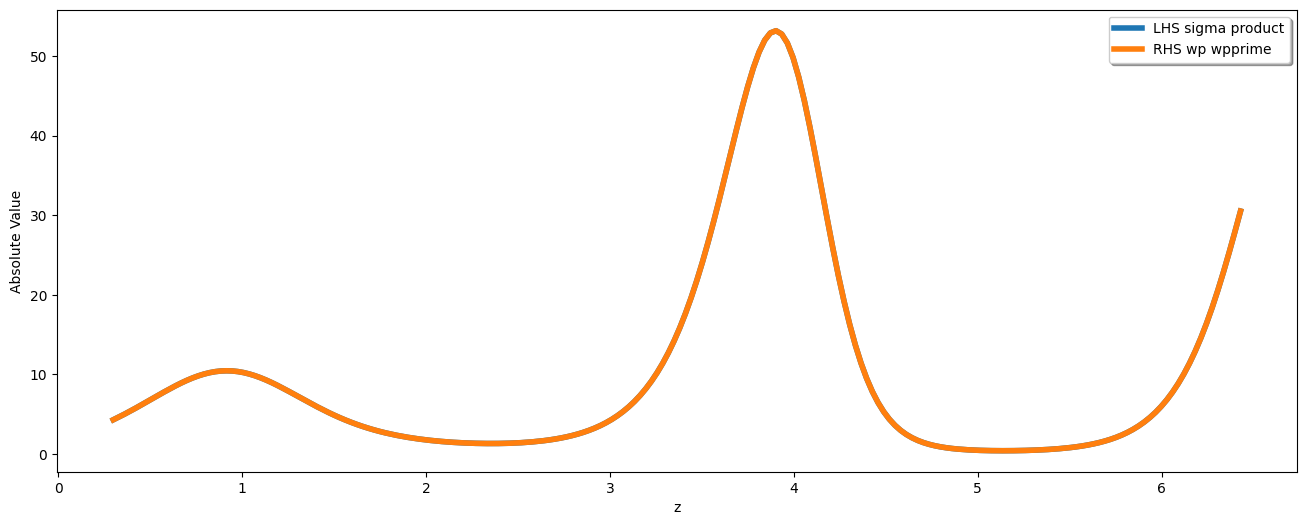

In [181]:
fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, square(absolute(analytic_sol_mpmath.T)), linestyle="solid", linewidth=4) 
plt.legend(['LHS sigma product', 'RHS wp wpprime'], shadow=True) 
plt.ylabel('Absolute Value')
plt.xlabel('z')
plt.show()

Text(0, 0.5, 'Phase (Radians)')

Text(0.5, 0, 'z')

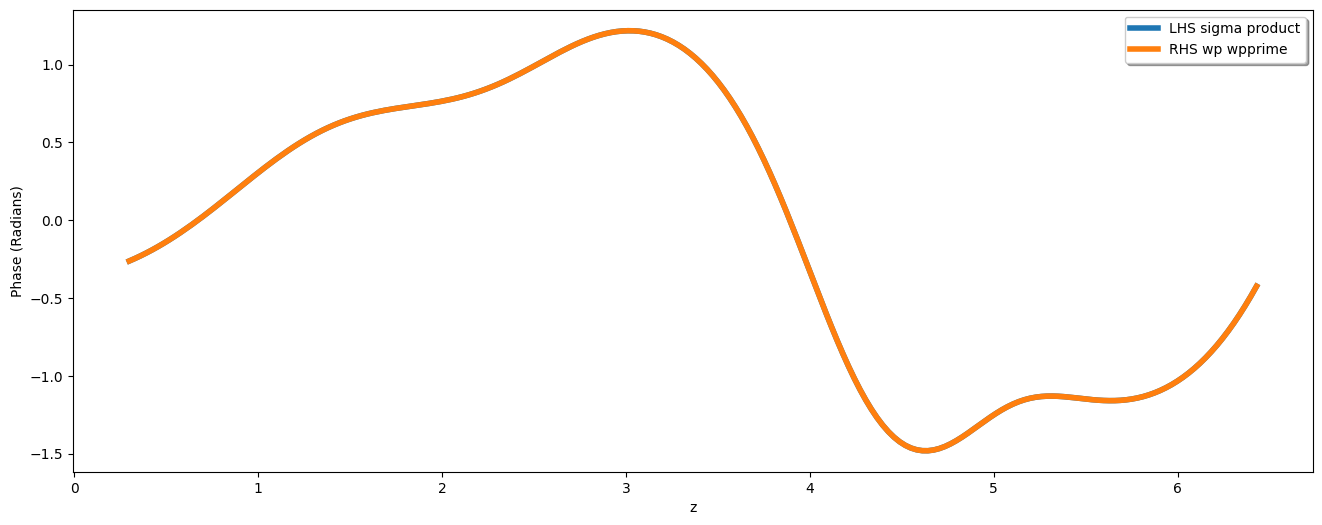

In [182]:
fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, angle(analytic_sol_mpmath.T), linestyle="solid", linewidth=4) 
plt.legend(['LHS sigma product', 'RHS wp wpprime'], shadow=True) 
plt.ylabel('Phase (Radians)')
plt.xlabel('z')
plt.show()

### Testing the formula for a product of 4 sigma ratios (cubic nonlinearity)

In [183]:
eq_4_modes_cubic_per_mode

Eq(Product(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, 3)), (pw(z, g2, g3) - pw(xi[l], g2, g3))*(-Sum(pw(xi[k], g2, g3), (k, 0, 3))/2 + Sum(zw(xi[k], g2, g3), (k, 0, 3))**2/2) + (pwp(z, g2, g3) - pwp(xi[l], g2, g3))*Sum(zw(xi[k], g2, g3), (k, 0, 3))/2 + pw(z, g2, g3)**2 - pw(xi[l], g2, g3)**2)

In [184]:
g2val_ = 0.2 + 1.8j
g3val_ = -1.7

xi0val_ = -1.89 + 0.2j
xi1val_ = 2.89 + 3.2j
xi2val_ = 0.897 +1.3j
xi3val_ = - xi0val_ - xi1val_ - xi2val_

z0 = 1.3 + 2j

# Calculate lattice of elliptic functions (half-periods) in terms of initial conditions
omega_ = we.omega_from_g(g2val_, g3val_)
omega1_ = mpc_to_float(omega_[0])
omega2_ = mpc_to_float(omega_[1])
omega3_ = mpc_to_float(omega_[2])
if im(omega2_/omega1_) <= 0:
    omega2_ = -omega2_
omegas = (omega1_, omega2_)  

# Setup z array to evaluate over based on 2 complete periods (4 * omega1)
z_start = 0.3
z_end = abs(4 * omega1_) + z_start
n_points_z = 200
z_eval = linspace(z_start, z_end, n_points_z) # evaluate integral from z = 0-10 for 50 points

In [185]:
# Complex valued analytic vector solution (numeric evaluation)
analytic_sol_mpmath = arraynp([
    mpc_to_float_np(vectorize(lhs_4_modes_sigma(z0, xi0val_, xi1val_, xi2val_, xi3val_, omegas))(z_eval)),
    mpc_to_float_np(vectorize(rhs_4_modes_pw(z0, xi0val_, xi1val_, xi2val_, xi3val_, xi2val_, omegas))(z_eval))    
]) 

Text(0, 0.5, 'Absolute Value')

Text(0.5, 0, 'z')

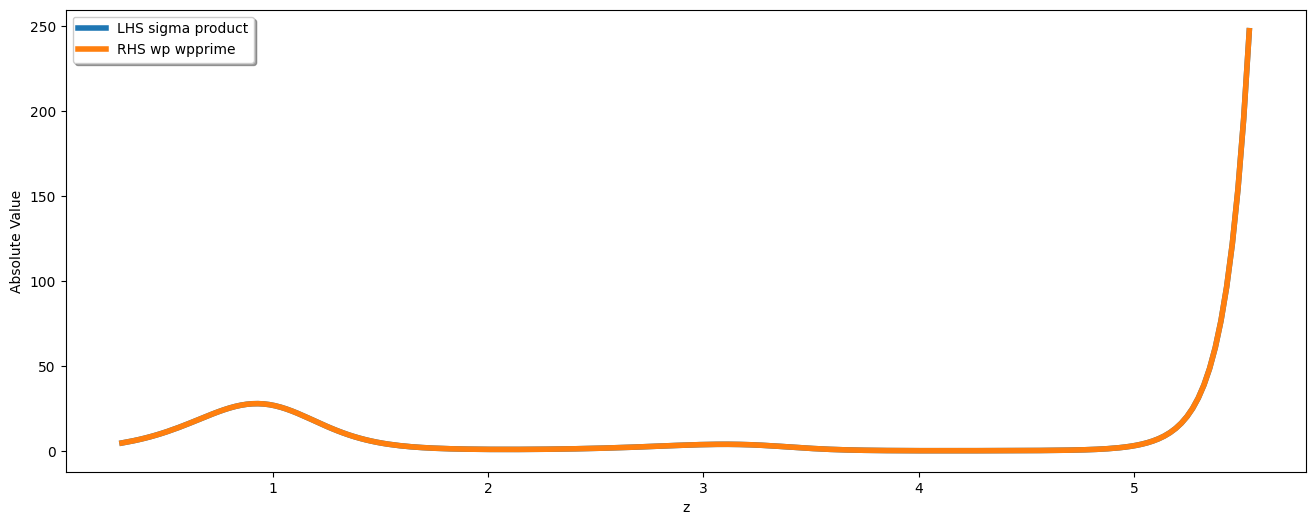

In [186]:
fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, square(absolute(analytic_sol_mpmath.T)), linestyle="solid", linewidth=4) 
plt.legend(['LHS sigma product', 'RHS wp wpprime'], shadow=True) 
plt.ylabel('Absolute Value')
plt.xlabel('z')
plt.show()

Text(0, 0.5, 'Phase (Radians)')

Text(0.5, 0, 'z')

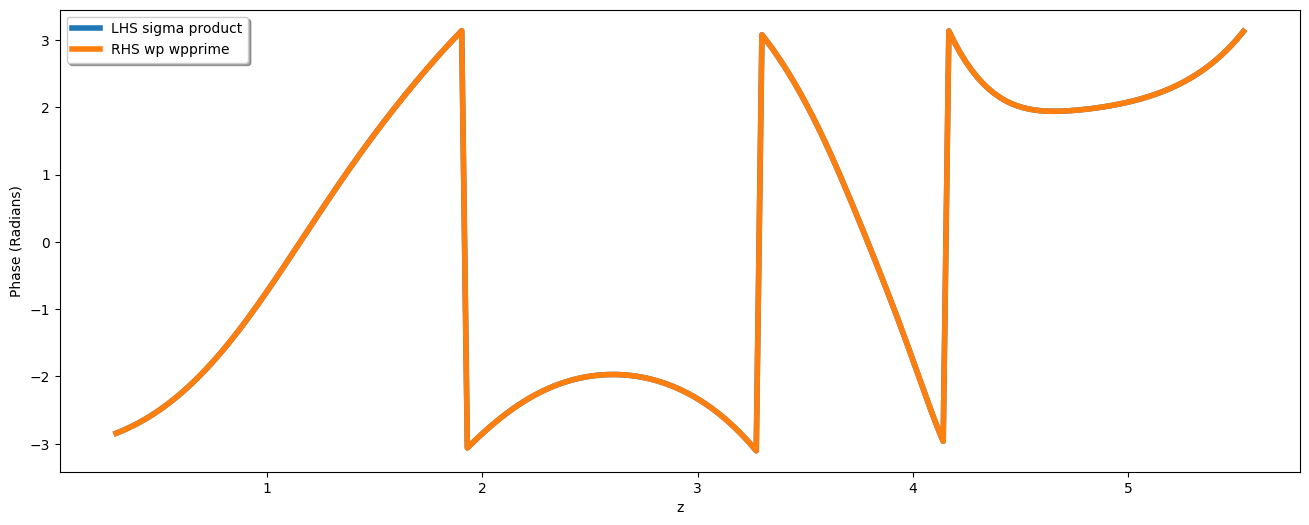

In [187]:
fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, angle(analytic_sol_mpmath.T), linestyle="solid", linewidth=4) 
plt.legend(['LHS sigma product', 'RHS wp wpprime'], shadow=True) 
plt.ylabel('Phase (Radians)')
plt.xlabel('z')
plt.show()

In [188]:
def rho_plus_l(l_):
    return (final_form_3_modes_plus
     .subs(sigma(z+xi[l],g2,g3),rho(z,xi[l])*sigma(z,g2,g3)*sigma(xi[l],g2,g3)).subs(l,l_).doit()
     .subs(sigma(z-xi[0],g2,g3),-rho(z,-xi[0])*sigma(z,g2,g3)*sigma(xi[0],g2,g3))
     .subs(sigma(z-xi[1],g2,g3),-rho(z,-xi[1])*sigma(z,g2,g3)*sigma(xi[1],g2,g3))
     .subs(sigma(z-xi[2],g2,g3),-rho(z,-xi[2])*sigma(z,g2,g3)*sigma(xi[2],g2,g3))
    )
def rho_minus_l(l_):
    xx_ = (final_form_3_modes_minus
     .subs(sigma(z-xi[l],g2,g3),-rho(z,-xi[l])*sigma(z,g2,g3)*sigma(xi[l],g2,g3)).subs(l,l_).doit()
     .subs(sigma(z+xi[0],g2,g3),rho(z,xi[0])*sigma(z,g2,g3)*sigma(xi[0],g2,g3))
     .subs(sigma(z+xi[1],g2,g3),rho(z,xi[1])*sigma(z,g2,g3)*sigma(xi[1],g2,g3))
     .subs(sigma(z+xi[2],g2,g3),rho(z,xi[2])*sigma(z,g2,g3)*sigma(xi[2],g2,g3))
    )
    return (Eq(-xx_.lhs, -xx_.rhs))

In [189]:
for _l in range(0,3):
    rho_plus_l(_l).subs(xi[2],- xi[0] - xi[1])
    rho_minus_l(_l).subs(xi[2],- xi[0] - xi[1])

Eq(Derivative(rho(z, xi[0]), z), -(zw(-xi[0] - xi[1], g2, g3) + zw(xi[1], g2, g3))*rho(z, xi[0]) - rho(z, xi[0] + xi[1])*rho(z, -xi[1]))

Eq(Derivative(rho(z, -xi[0]), z), (zw(-xi[0] - xi[1], g2, g3) + zw(xi[1], g2, g3))*rho(z, -xi[0]) - rho(z, -xi[0] - xi[1])*rho(z, xi[1]))

Eq(Derivative(rho(z, xi[1]), z), -(zw(-xi[0] - xi[1], g2, g3) + zw(xi[0], g2, g3))*rho(z, xi[1]) - rho(z, xi[0] + xi[1])*rho(z, -xi[0]))

Eq(Derivative(rho(z, -xi[1]), z), (zw(-xi[0] - xi[1], g2, g3) + zw(xi[0], g2, g3))*rho(z, -xi[1]) - rho(z, -xi[0] - xi[1])*rho(z, xi[0]))

Eq(Derivative(rho(z, -xi[0] - xi[1]), z), -(zw(xi[0], g2, g3) + zw(xi[1], g2, g3))*rho(z, -xi[0] - xi[1]) - rho(z, -xi[0])*rho(z, -xi[1]))

Eq(Derivative(rho(z, xi[0] + xi[1]), z), (zw(xi[0], g2, g3) + zw(xi[1], g2, g3))*rho(z, xi[0] + xi[1]) - rho(z, xi[0])*rho(z, xi[1]))

In [190]:
subx1__ = [
    *[rho_plus_l(_l).subs(xi[2],- xi[0] - xi[1]).args for _l in range(0,3)],
    *[rho_minus_l(_l).subs(xi[2],- xi[0] - xi[1]).args for _l in range(0,3)]
   ]
Eq(Derivative(rho(z,xi[0])*rho(z,-xi[0]),(z,1)),
   diff(rho(z,xi[0])*rho(z,-xi[0]),(z,1)).subs(subx1__).doit().expand().subs(subx1__).doit().expand()
  )

Eq(Derivative(rho(z, -xi[0])*rho(z, xi[0]), z), -rho(z, -xi[0] - xi[1])*rho(z, xi[0])*rho(z, xi[1]) - rho(z, xi[0] + xi[1])*rho(z, -xi[0])*rho(z, -xi[1]))

In [191]:
rho_subs = [
    (rho(z,xi[0]), h(z)), (rho(z,xi[1]), s(z)), (rho(z,xi[0] + xi[1]), f(z)),
    (rho(z,-xi[0]), h(z)), (rho(z,-xi[1]), s(z)), (rho(z,-xi[0] - xi[1]), f(z))
]
for _l in range(0,3):
    rho_plus_l(_l).subs(xi[2],- xi[0] - xi[1]).subs(rho_subs)
    rho_minus_l(_l).subs(xi[2],- xi[0] - xi[1]).subs(rho_subs)

Eq(Derivative(h(z), z), -(zw(-xi[0] - xi[1], g2, g3) + zw(xi[1], g2, g3))*h(z) - f(z)*s(z))

Eq(Derivative(h(z), z), (zw(-xi[0] - xi[1], g2, g3) + zw(xi[1], g2, g3))*h(z) - f(z)*s(z))

Eq(Derivative(s(z), z), -(zw(-xi[0] - xi[1], g2, g3) + zw(xi[0], g2, g3))*s(z) - f(z)*h(z))

Eq(Derivative(s(z), z), (zw(-xi[0] - xi[1], g2, g3) + zw(xi[0], g2, g3))*s(z) - f(z)*h(z))

Eq(Derivative(f(z), z), -(zw(xi[0], g2, g3) + zw(xi[1], g2, g3))*f(z) - h(z)*s(z))

Eq(Derivative(f(z), z), (zw(xi[0], g2, g3) + zw(xi[1], g2, g3))*f(z) - h(z)*s(z))

In [192]:
gauge_transforms = [
    (mu[0], zw(xi[2],g2,g3) + zw(xi[1],g2,g3)),
    (mu[1], zw(xi[2],g2,g3) + zw(xi[0],g2,g3)),
    (mu[2], zw(xi[0],g2,g3) + zw(xi[1],g2,g3))
]
# gauge_transforms = [
#     (mu[0], -zw(xi[0],g2,g3)),
#     (mu[1], -zw(xi[1],g2,g3)),
#     (mu[2], -zw(xi[2],g2,g3))
# ]
h_subs = (
    [(rho(z,xi[_l]), h(z, xi[_l])*exp(-mu[_l]*z)) for _l in range(0,3)] +
    [(rho(z,-xi[_l]), h(z, -xi[_l])*exp(mu[_l]*z)) for _l in range(0,3)]
)
for _l in range(0,3):
    Eq(diff(h(z,xi[_l]),z), 
       solve(rho_plus_l(_l).subs(h_subs).doit().subs(gauge_transforms), diff(h(z,xi[_l]),z))[0])
    Eq(diff(h(z,-xi[_l]),z), 
       solve(rho_minus_l(_l).subs(h_subs).doit().subs(gauge_transforms), diff(h(z,-xi[_l]),z))[0])

Eq(Derivative(h(z, xi[0]), z), -h(z, -xi[1])*h(z, -xi[2])*exp(2*z*(zw(xi[0], g2, g3) + zw(xi[1], g2, g3) + zw(xi[2], g2, g3))))

Eq(Derivative(h(z, -xi[0]), z), -h(z, xi[1])*h(z, xi[2])*exp(-2*z*(zw(xi[0], g2, g3) + zw(xi[1], g2, g3) + zw(xi[2], g2, g3))))

Eq(Derivative(h(z, xi[1]), z), -h(z, -xi[0])*h(z, -xi[2])*exp(2*z*(zw(xi[0], g2, g3) + zw(xi[1], g2, g3) + zw(xi[2], g2, g3))))

Eq(Derivative(h(z, -xi[1]), z), -h(z, xi[0])*h(z, xi[2])*exp(-2*z*(zw(xi[0], g2, g3) + zw(xi[1], g2, g3) + zw(xi[2], g2, g3))))

Eq(Derivative(h(z, xi[2]), z), -h(z, -xi[0])*h(z, -xi[1])*exp(2*z*(zw(xi[0], g2, g3) + zw(xi[1], g2, g3) + zw(xi[2], g2, g3))))

Eq(Derivative(h(z, -xi[2]), z), -h(z, xi[0])*h(z, xi[1])*exp(-2*z*(zw(xi[0], g2, g3) + zw(xi[1], g2, g3) + zw(xi[2], g2, g3))))

In [193]:
sigma_product_wp_diff_eq

Eq((-1)**(1 - N)*Product(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, N)), c[0] + Sum(Derivative(pw(z, g2, g3), (z, j))*c[j + 1], (j, 0, N - 1)))

In [194]:
expansion_z_j_order_diff_wp_lim_z_0_approx_sum = Eq(
    Sum(expansion_z_j_order_diff_wp_lim_z_0_approx.lhs*c[j+1],(j,0,N-1)), 
    Sum(expansion_z_j_order_diff_wp_lim_z_0_approx.rhs*c[j+1],(j,0,N-1))
)
expansion_z_j_order_diff_wp_lim_z_0_approx_sum

Eq(Sum(Derivative(pw(z, g2, g3), (z, j))*c[j + 1], (j, 0, N - 1)), Sum(((-1)**j*z**(-j - 2)*factorial(j + 1) + ((-1)**j/2 + 1/2)*factorial(j + 1)*G[j + 2])*c[j + 1], (j, 0, N - 1)))

In [195]:
__eq0 = sigma_product_wp_diff_eq.subs(*expansion_z_j_order_diff_wp_lim_z_0_approx_sum.args)
__eq0

Eq((-1)**(1 - N)*Product(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, N)), c[0] + Sum(((-1)**j*z**(-j - 2)*factorial(j + 1) + ((-1)**j/2 + 1/2)*factorial(j + 1)*G[j + 2])*c[j + 1], (j, 0, N - 1)))

In [196]:
__eq1 = Eq(__eq0.lhs*z**(N+1), __eq0.rhs*z**(N+1))
__eq1

Eq((-1)**(1 - N)*z**(N + 1)*Product(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, N)), z**(N + 1)*(c[0] + Sum(((-1)**j*z**(-j - 2)*factorial(j + 1) + ((-1)**j/2 + 1/2)*factorial(j + 1)*G[j + 2])*c[j + 1], (j, 0, N - 1))))

In [197]:
__eq2 = Eq(
    __eq1.rhs,
    z**(N+1)*(c[0] + Sum(factorial(2*j+1)*G[2*j+2]*c[2*j+1],(j,0,floor((N-1)/2)))) + 
    -(-1)**N*Sum((-1)**j*factorial(N-j)*z**j*c[N - j],(j,0,N-1))
    
 )
print((__eq2.lhs - __eq2.rhs).subs(N,13).doit().expand() == 0)
print((__eq2.lhs - __eq2.rhs).subs(N,14).doit().expand() == 0)
__eq2

True
True


Eq(z**(N + 1)*(c[0] + Sum(((-1)**j*z**(-j - 2)*factorial(j + 1) + ((-1)**j/2 + 1/2)*factorial(j + 1)*G[j + 2])*c[j + 1], (j, 0, N - 1))), -(-1)**N*Sum((-1)**j*z**j*factorial(N - j)*c[N - j], (j, 0, N - 1)) + z**(N + 1)*(c[0] + Sum(factorial(2*j + 1)*G[2*j + 2]*c[2*j + 1], (j, 0, floor(N/2 - 1/2)))))

In [198]:
__eq3 = __eq1.subs(*__eq2.args)
__eq3

Eq((-1)**(1 - N)*z**(N + 1)*Product(sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, N)), -(-1)**N*Sum((-1)**j*z**j*factorial(N - j)*c[N - j], (j, 0, N - 1)) + z**(N + 1)*(c[0] + Sum(factorial(2*j + 1)*G[2*j + 2]*c[2*j + 1], (j, 0, floor(N/2 - 1/2)))))

In [199]:
Eq(diff(z**n,(z,n))/factorial(n),1)

Eq(Derivative(z**n, (z, n))/factorial(n), 1)

In [200]:
__eq4 = Eq(
    (-1)**k*Limit(diff(
        Product(z*sigma(z-xi[l],g2,g3)/sigma(z,g2,g3)/sigma(xi[l],g2,g3),(l,0,N))
        ,(z,k)),z,0)/factorial(N-k)/factorial(k),
    c[N - k]
)
__eq4

Eq((-1)**k*Limit(Derivative(Product(z*sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, N)), (z, k)), z, 0, dir='+')/(factorial(k)*factorial(N - k)), c[N - k])

In [201]:
(-1)**k*diff(
        Product(z*sigma(z-xi[l],g2,g3)/sigma(z,g2,g3)/sigma(xi[l],g2,g3),(l,0,N))
    ,(z,k))/factorial(N-k)/factorial(k)

(-1)**k*Derivative(Product(z*sigma(z - xi[l], g2, g3)/(sigma(z, g2, g3)*sigma(xi[l], g2, g3)), (l, 0, N)), (z, k))/(factorial(k)*factorial(N - k))

In [202]:
((-1)**k*diff(
        Product(z*sigma(z-xi[l],g2,g3)/sigma(z,g2,g3)/sigma(xi[l],g2,g3),(l,0,N))
    ,(z,k))/factorial(N-k)/factorial(k)).subs([(N,2),(k,1)]).doit()

-z**3*sigma(z - xi[0], g2, g3)*sigma(z - xi[1], g2, g3)*Subs(Derivative(sigma(_xi_1, g2, g3), _xi_1), _xi_1, z - xi[2])/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)*sigma(xi[1], g2, g3)*sigma(xi[2], g2, g3)) - z**3*sigma(z - xi[0], g2, g3)*sigma(z - xi[2], g2, g3)*Subs(Derivative(sigma(_xi_1, g2, g3), _xi_1), _xi_1, z - xi[1])/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)*sigma(xi[1], g2, g3)*sigma(xi[2], g2, g3)) - z**3*sigma(z - xi[1], g2, g3)*sigma(z - xi[2], g2, g3)*Subs(Derivative(sigma(_xi_1, g2, g3), _xi_1), _xi_1, z - xi[0])/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)*sigma(xi[1], g2, g3)*sigma(xi[2], g2, g3)) + 3*z**3*sigma(z - xi[0], g2, g3)*sigma(z - xi[1], g2, g3)*sigma(z - xi[2], g2, g3)*Derivative(sigma(z, g2, g3), z)/(sigma(z, g2, g3)**4*sigma(xi[0], g2, g3)*sigma(xi[1], g2, g3)*sigma(xi[2], g2, g3)) - 3*z**2*sigma(z - xi[0], g2, g3)*sigma(z - xi[1], g2, g3)*sigma(z - xi[2], g2, g3)/(sigma(z, g2, g3)**3*sigma(xi[0], g2, g3)*sigma(xi[1], g2, g3)*sigma(xi[2], g2, g3))

In [203]:
__eq4.subs([(N,2),(k,1)]).doit()

NotImplementedError: Don't know how to calculate the mrv of 'Subs(Derivative(sigma(_xi_1, g2, g3), _xi_1), _xi_1, -xi[0] + 1/_p)'

In [ ]:
sigma_product_wp_diff_eq.subs(*expansion_z_j_order_diff_wp_lim_z_0_approx_sum.args).subs(N,2).doit()

In [ ]:
sigma_product_wp_diff_eq.subs(*expansion_z_j_order_diff_wp_lim_z_0_approx_sum.args).subs(N,3).doit()

In [ ]:
sigma_product_wp_diff_eq.subs(*expansion_z_j_order_diff_wp_lim_z_0_approx_sum.args).subs(N,4).doit()

In [ ]:
(__c.rhs*z**(N+1)).subs(N,6).doit().expand().collect(z)

In [ ]:
NN__=6
sum([-(-1)**k*factorial(k)*z**(NN__-k)*c[k] for k in range(1,NN__+1)])

In [ ]:
sum([(-1)**k*factorial(NN__-k+1)*z**(k-1)*c[NN__ - k + 1] for k in range(1,NN__+1)])

In [ ]:
(-1)**k*factorial(N-k+1)*z**k*c[N - k + 1]

In [ ]:
(-1)**j*factorial(N-j+1)*z**(j-1)*c[N - j + 1]

In [ ]:
list(range(1,NN__+1))